In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import scipy.sparse.linalg as sla
from scipy.optimize import curve_fit
import csv
import random
import re

# Example of Nodal Loops from Miguels Book

In [4]:
def E_H(kx,ky,kz,k0,v):
    h = np.zeros((2,2),dtype=np.complex_)
    h[0,0] = k0**2 - (kx**2 + ky**2)**2
    h[-1,-1] = -h[0,0]
    h[0,1] = -v*kz*1j
    h[1,0] = np.conjugate(h[0,1])
    coisas_pp = np.linalg.eigh(h)
    return coisas_pp

C:\Users\user\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1687: ComplexWarning: Casting complex values to real discards the imaginary part
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
C:\Users\user\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1688: ComplexWarning: Casting complex values to real discards the imaginary part
  v2[poly_i, :] = ps[i2, :] - ps[i3, :]


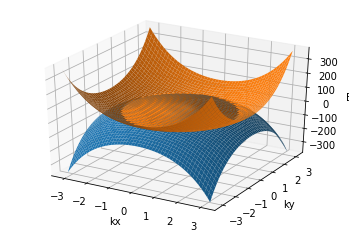

In [9]:
kx = np.linspace(-np.pi,np.pi,1000)
ky = np.linspace(-np.pi,np.pi,1000)



from mpl_toolkits import mplot3d

X,Y = np.meshgrid(kx,ky)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('E')

for l in range(0,2):
    En = np.zeros((len(kx),len(ky)),dtype=np.complex_)
    for i in range(0,len(kx)):
        for j in range(0,len(ky)):
            En[i,j] = E_H(kx[i],ky[j],0.,5.,1.)[0][l]
    Z1 = En
    ax.plot_surface(X, Y, Z1)

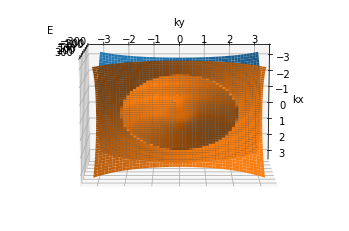

In [10]:
ax.view_init(90,0)
fig

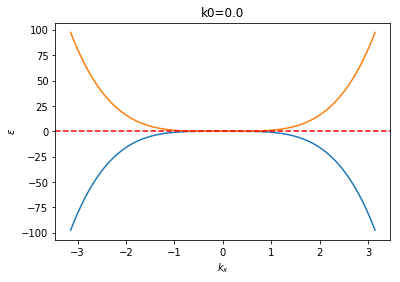

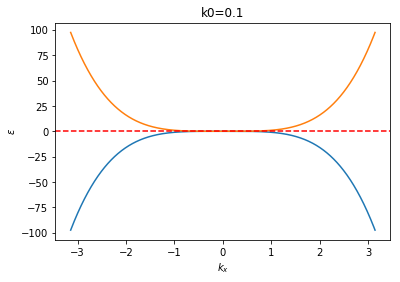

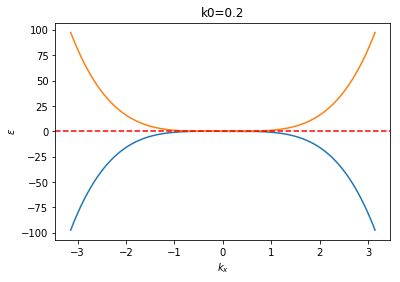

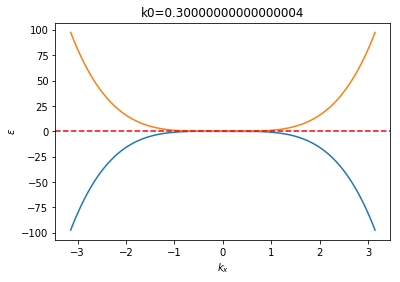

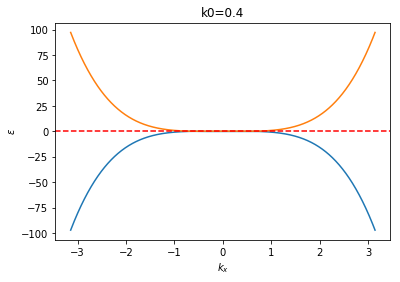

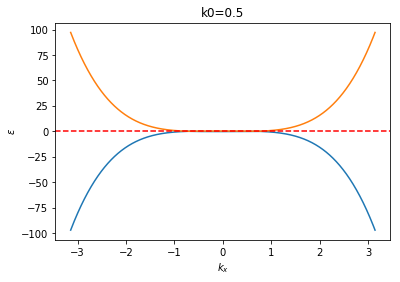

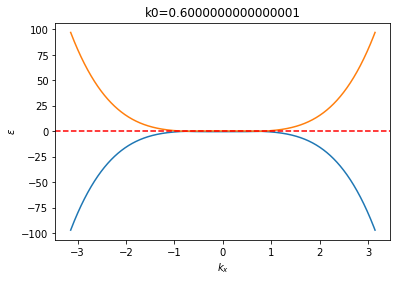

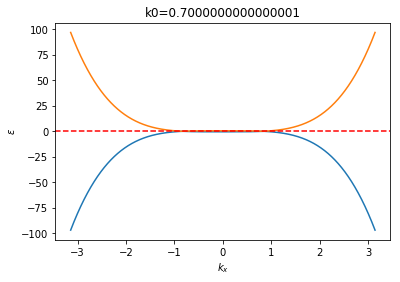

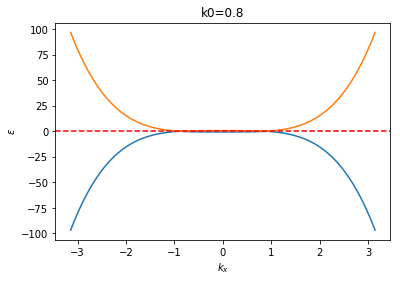

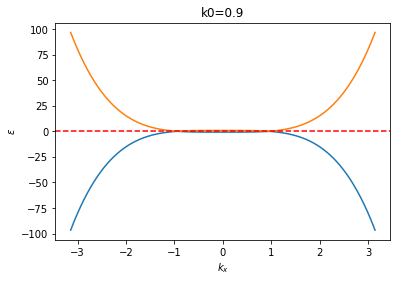

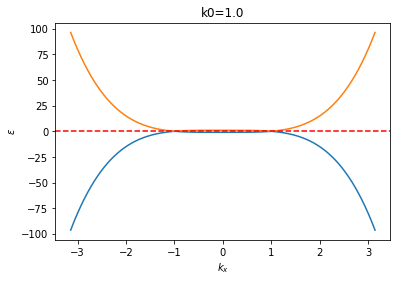

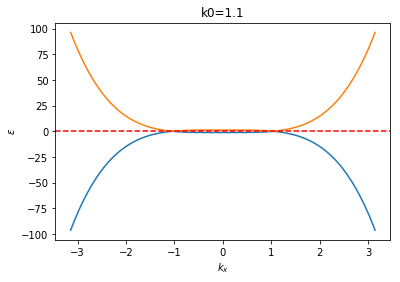

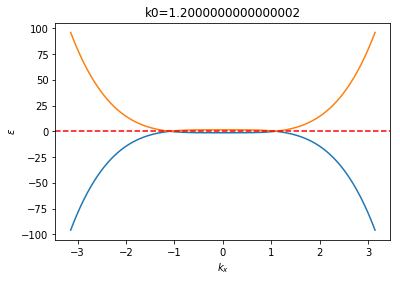

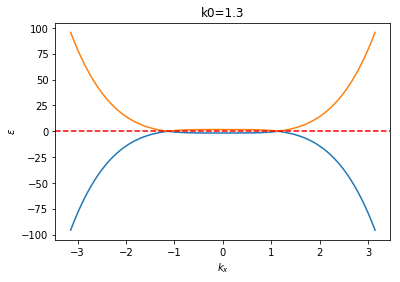

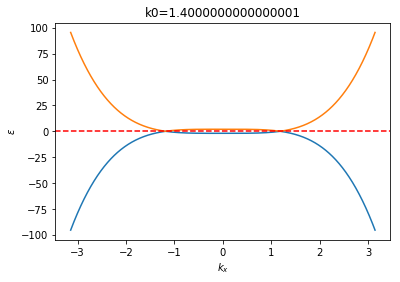

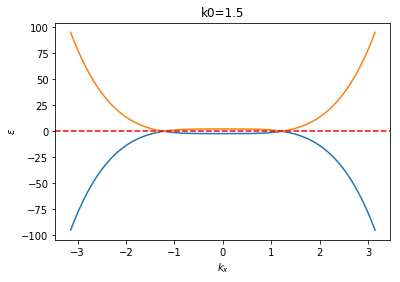

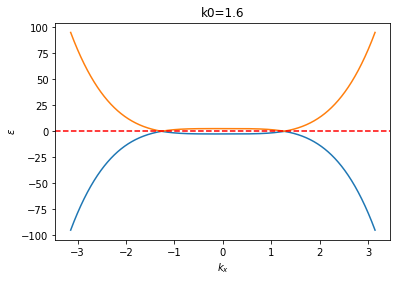

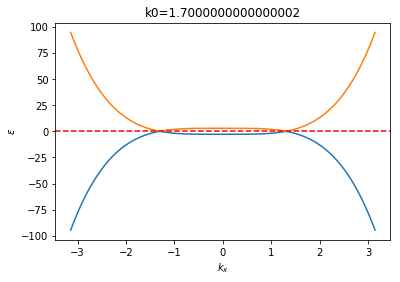

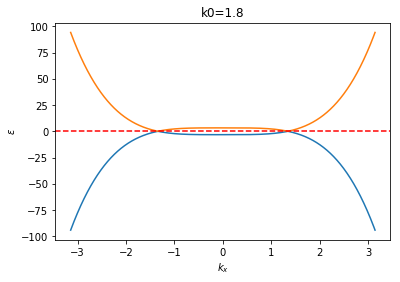

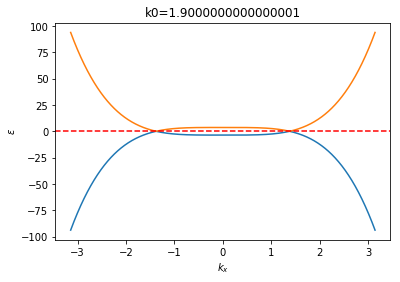

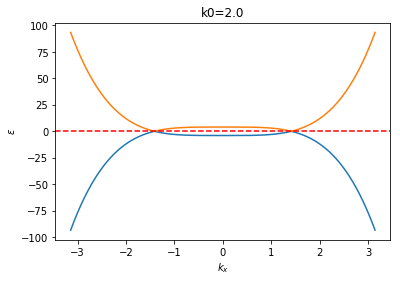

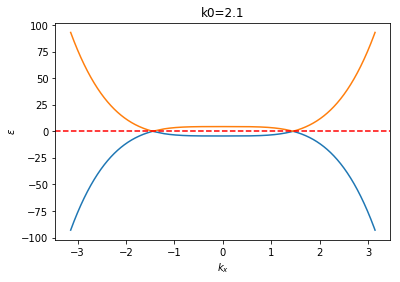

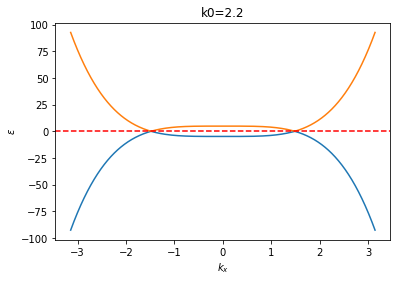

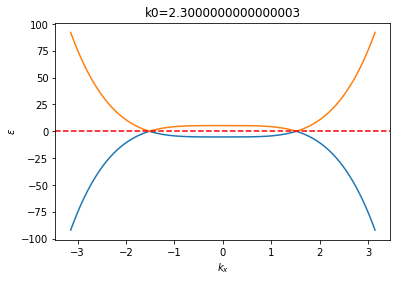

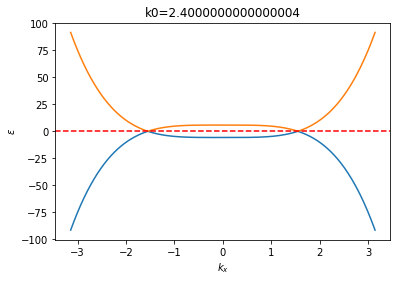

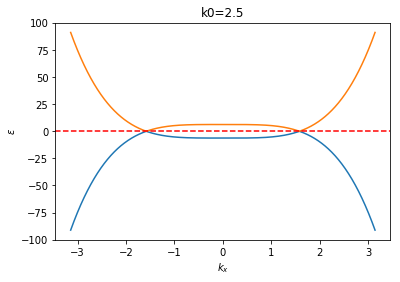

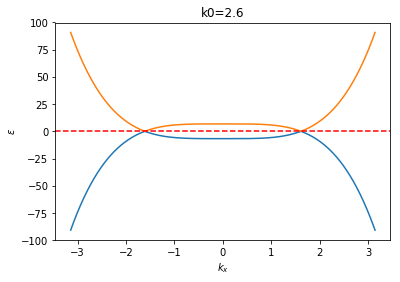

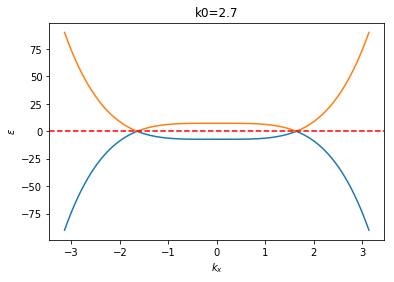

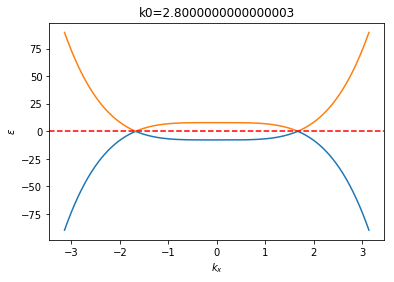

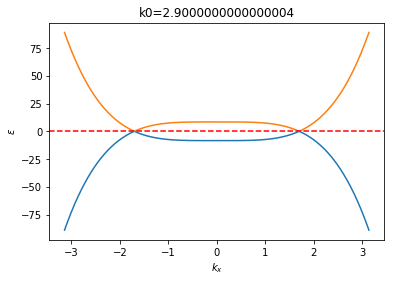

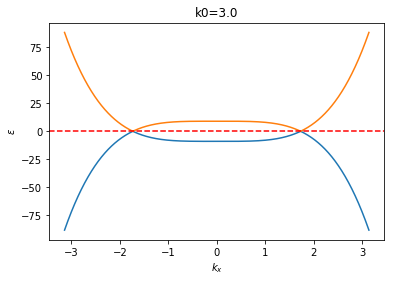

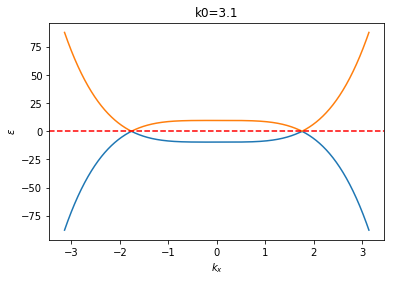

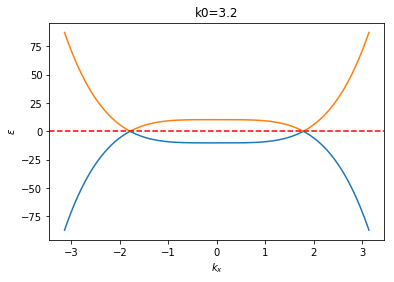

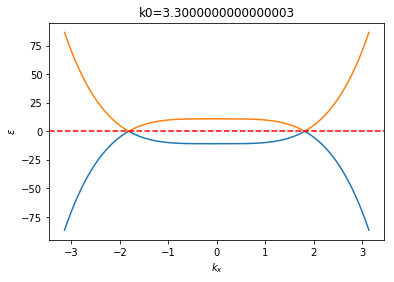

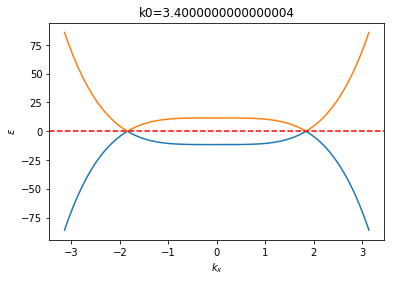

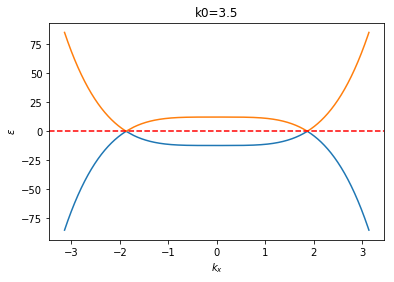

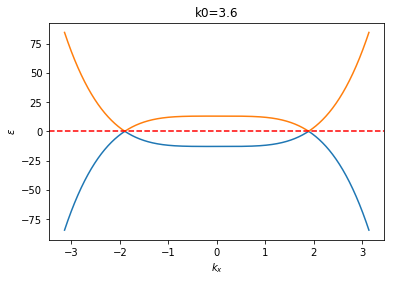

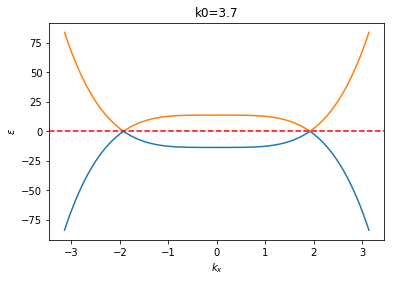

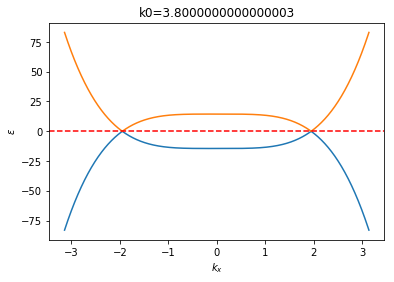

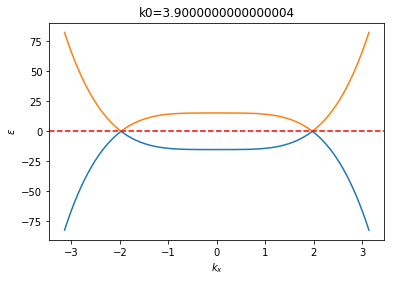

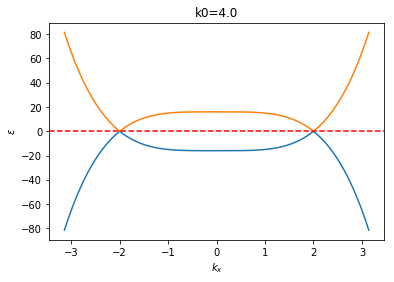

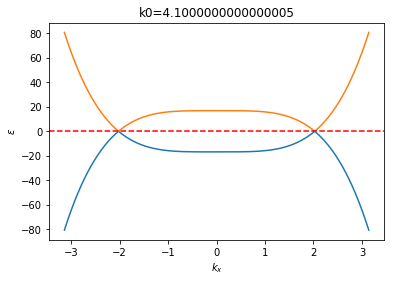

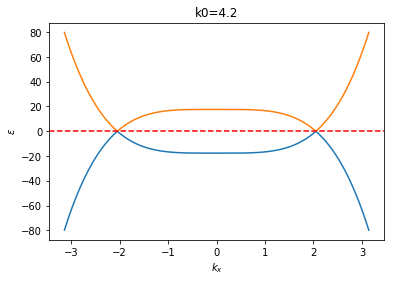

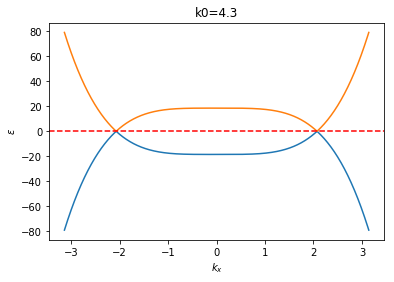

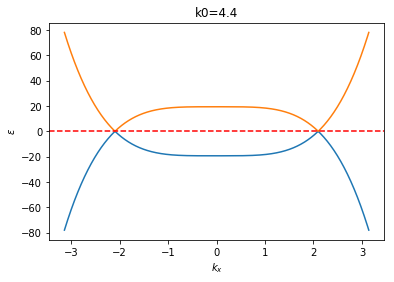

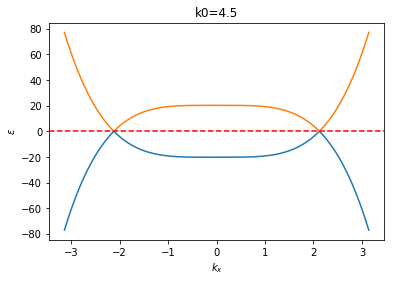

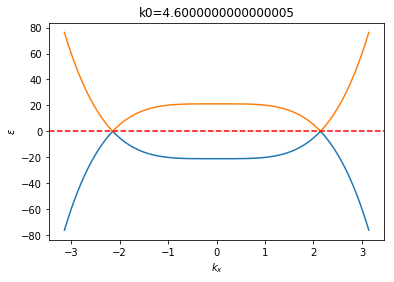

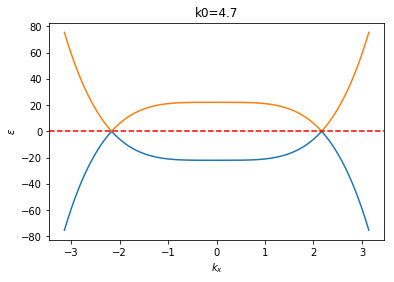

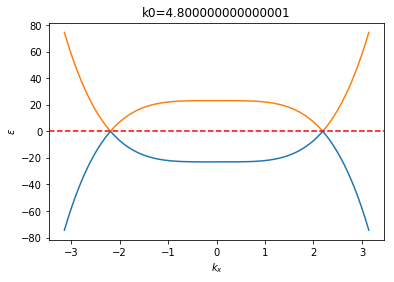

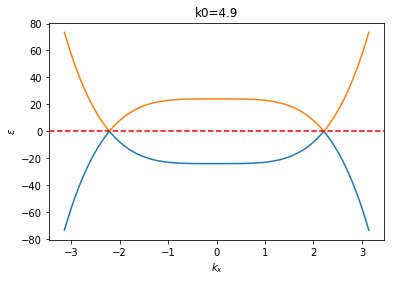

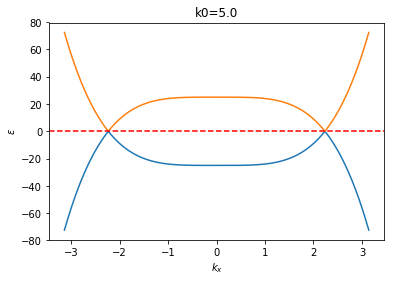

In [11]:
kx = np.linspace(-np.pi,np.pi,1000)




from mpl_toolkits import mplot3d

for k0 in np.arange(0,5.1,0.1):

    for l in range(0,2):
        En = np.zeros((len(kx)),dtype=np.complex_)
        for i in range(0,len(kx)):
            En[i] = E_H(kx[i],0.,0.,k0,1.)[0][l]
        plt.plot(kx,En,'-')
        plt.title('k0='+str(k0))
        plt.ylabel('$\epsilon$')
        plt.xlabel('$k_x$')
    plt.axhline(0,color='r', linestyle="--")
    plt.show()

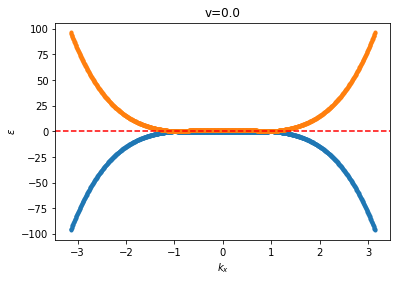

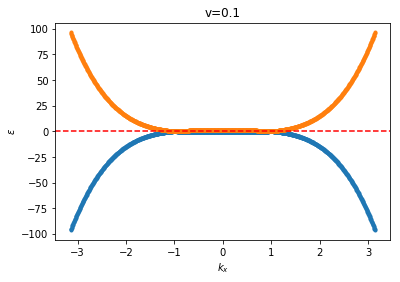

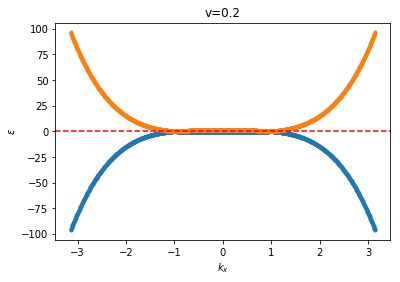

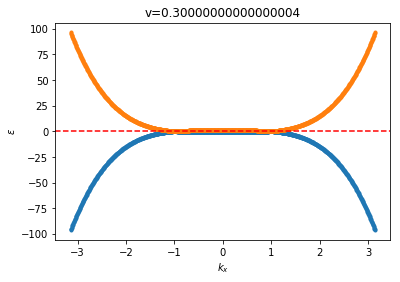

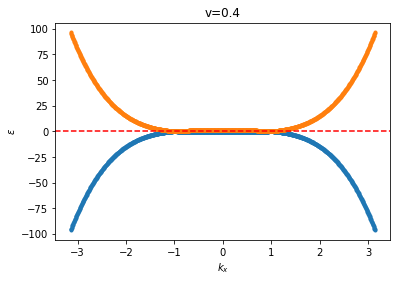

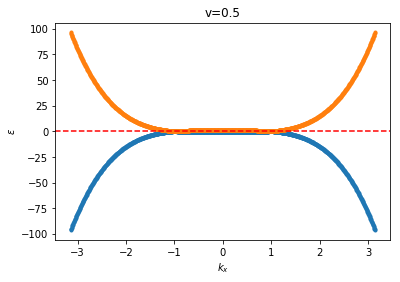

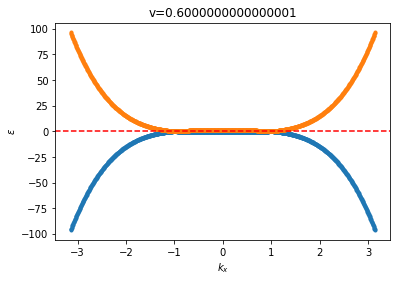

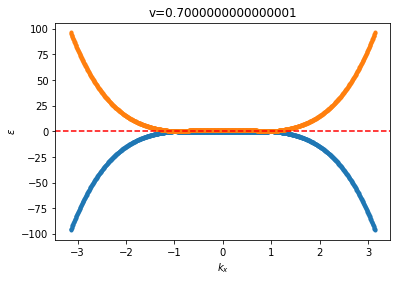

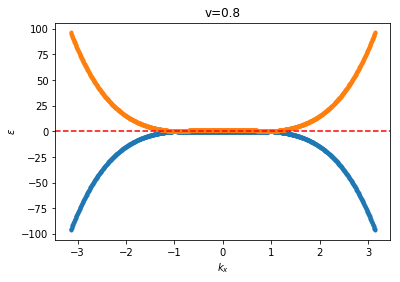

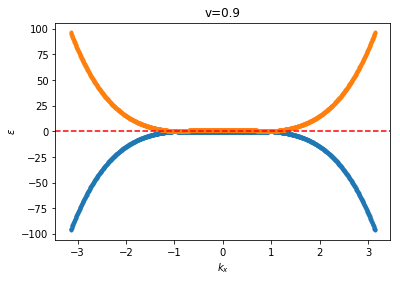

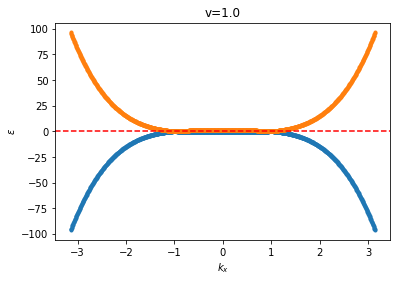

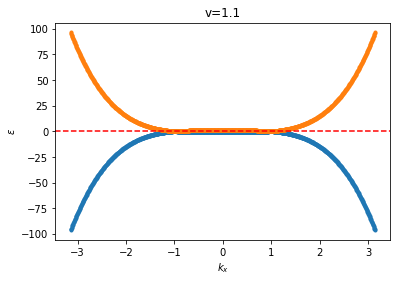

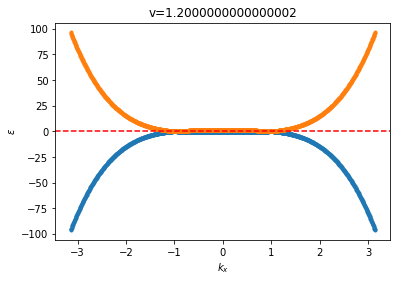

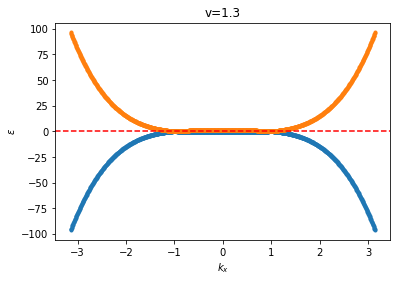

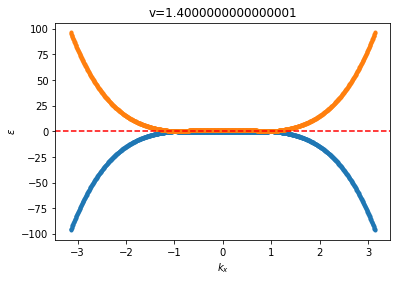

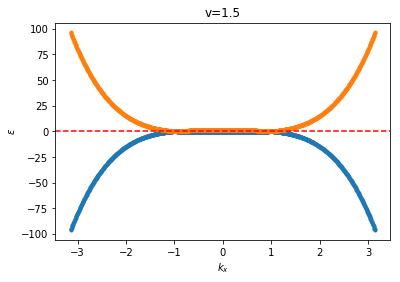

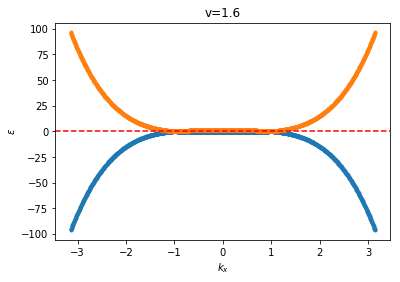

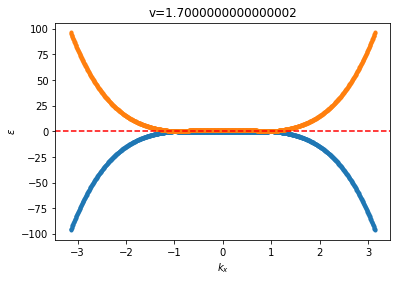

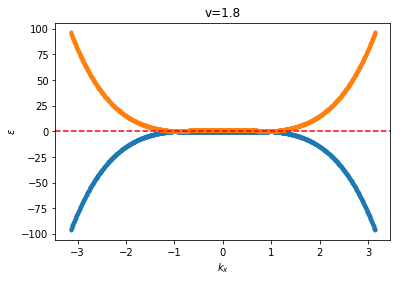

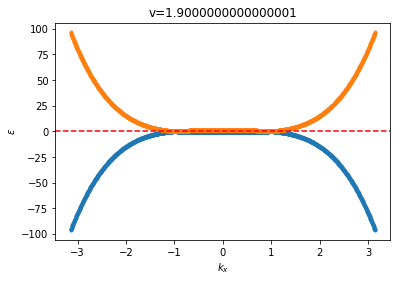

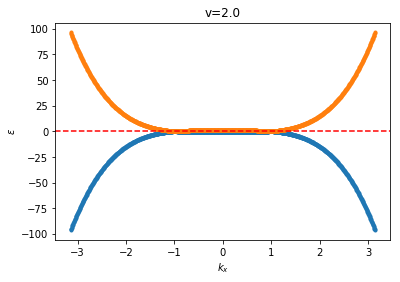

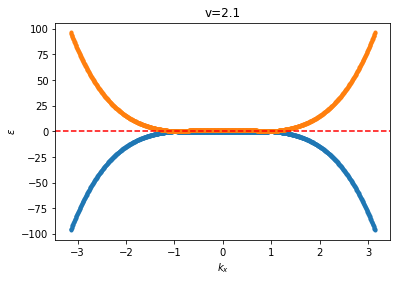

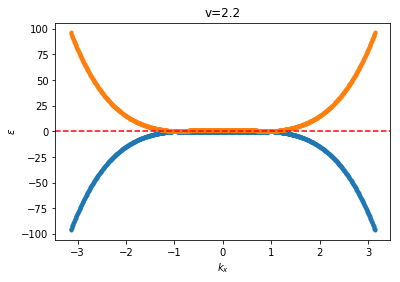

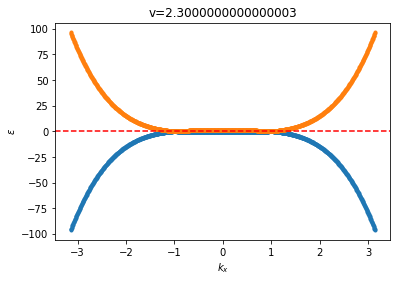

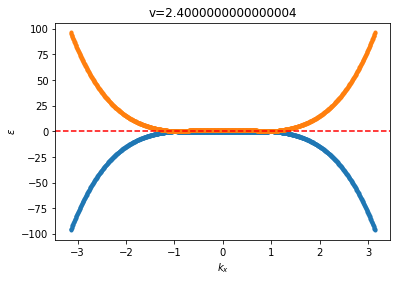

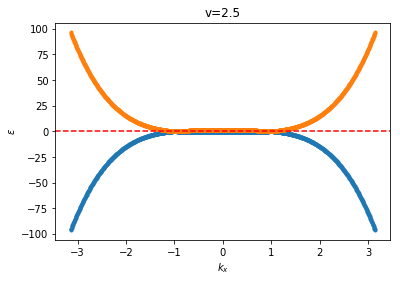

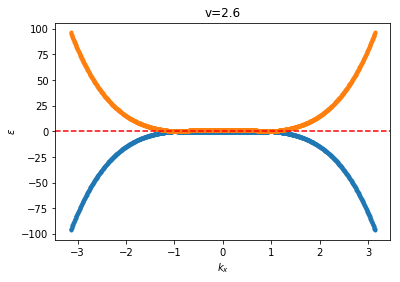

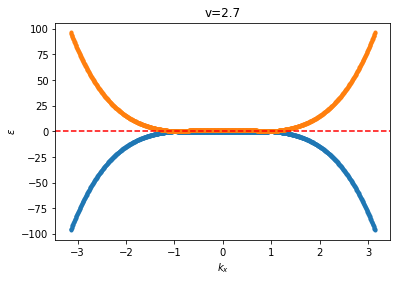

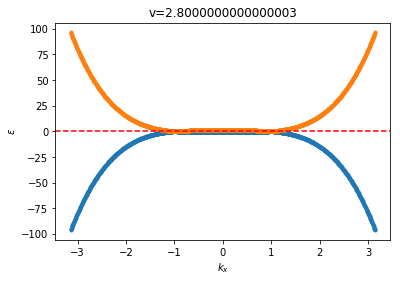

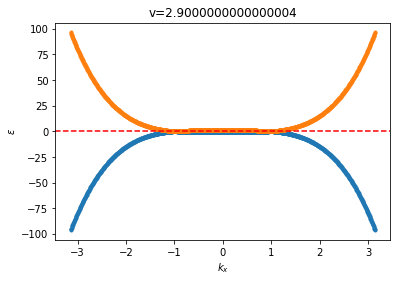

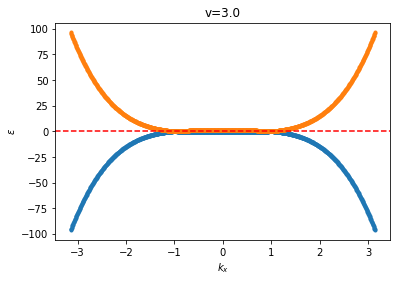

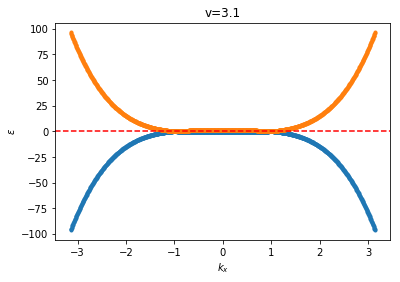

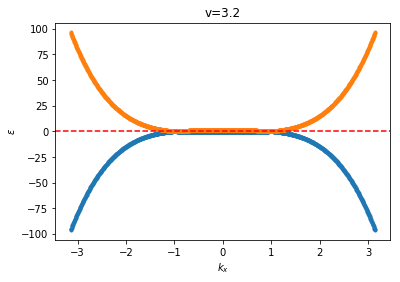

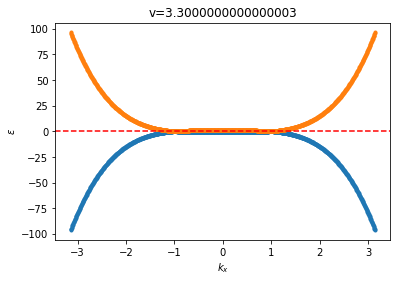

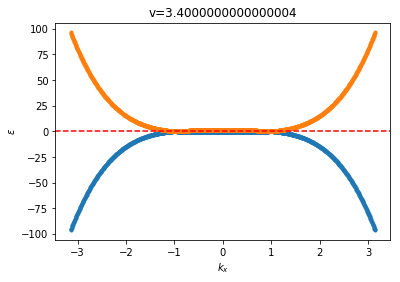

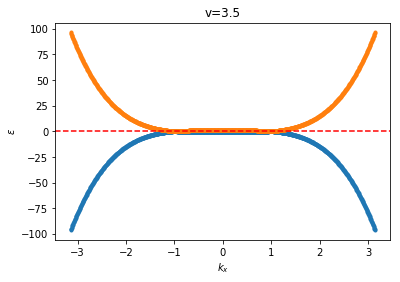

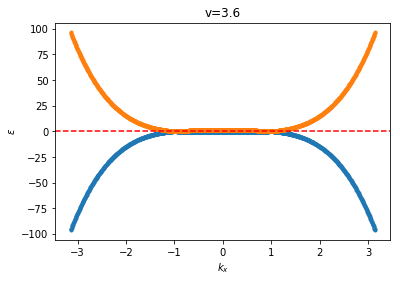

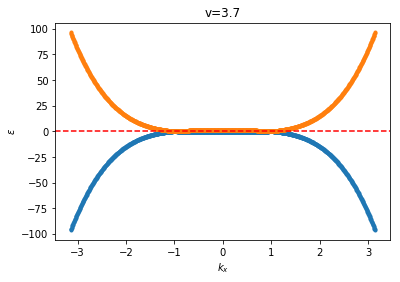

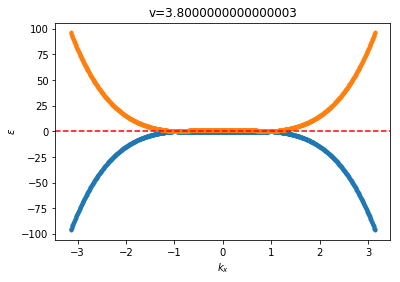

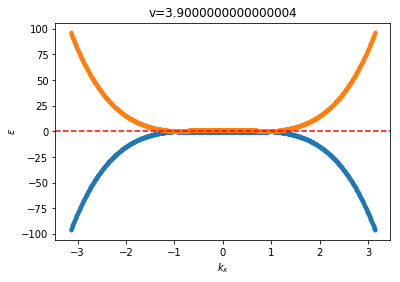

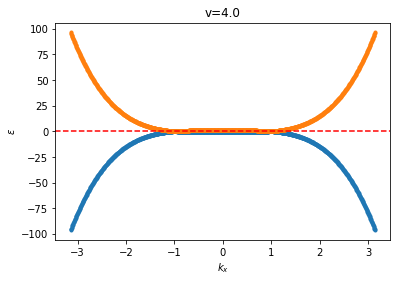

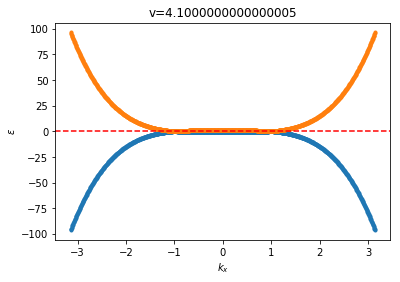

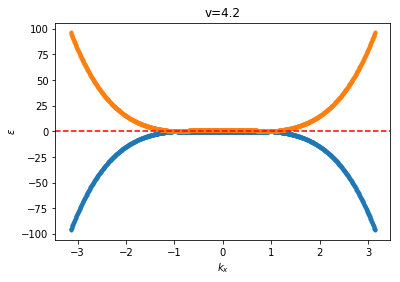

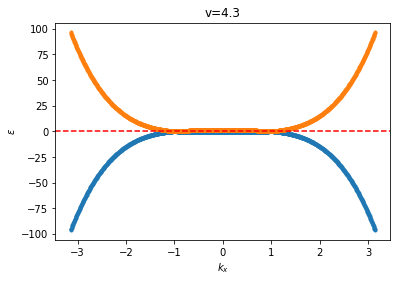

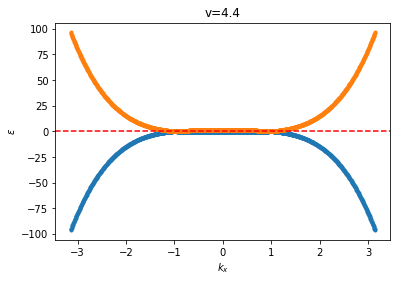

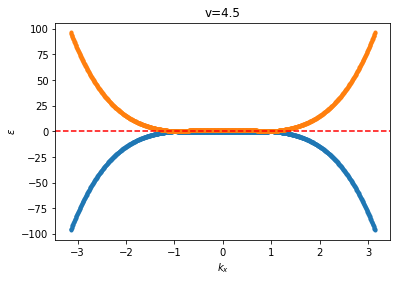

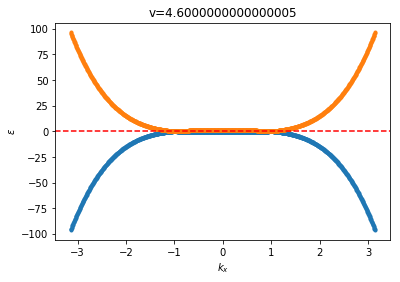

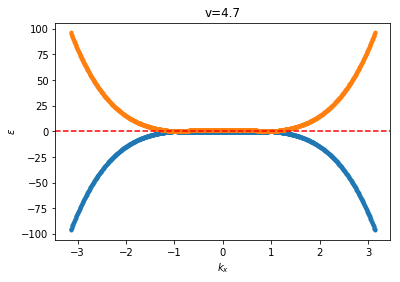

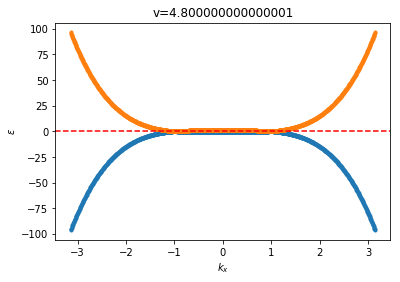

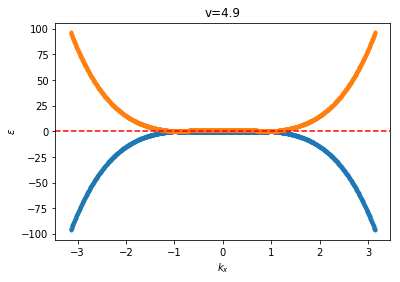

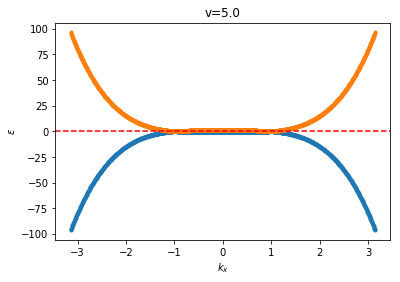

In [12]:
kx = np.linspace(-np.pi,np.pi,1000)




from mpl_toolkits import mplot3d

for v in np.arange(0,5.1,0.1):

    for l in range(0,2):
        En = np.zeros((len(kx)),dtype=np.complex_)
        for i in range(0,len(kx)):
            En[i] = E_H(kx[i],0.,0.,1.,v)[0][l]
        plt.plot(kx,En,'.')
        plt.title('v='+str(v))
        plt.ylabel('$\epsilon$')
        plt.xlabel('$k_x$')
    plt.axhline(0,color='r', linestyle="--")
    plt.show()

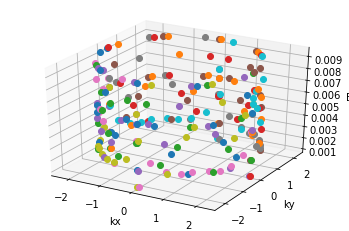

In [17]:
kx = np.linspace(-np.pi,np.pi,1000)
ky = np.linspace(-np.pi,np.pi,1000)


from mpl_toolkits import mplot3d


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('E')


for i in range(len(kx)):
    for j in range(len(ky)):
        en = E_H(kx[i],ky[j],0.,5.,1.)[0][1]
        if -1e-2<en<1e-2:
            ax.plot([kx[i]], [ky[j]], [en],marker = 'o')
            

            


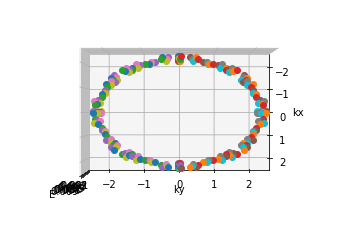

In [18]:
ax.view_init(90,0)
fig

# From article

## Miguel Method

In [2]:
# returns nearest neighbors of site (x,y,z) 

def f(Lx,Ly,Lz, x,y,z):
    xm1= (x-1)%Lx  
    xp1=(x+1)%Lx  
    ym1= (y-1)%Ly 
    yp1=(y+1)%Ly  
    zm1= (z-1)%Lz 
    zp1=(z+1)%Lz  
  
    return np.array([[xm1,y,z], [xp1,y,z], [x,ym1,z], [x,yp1,z], [x,y,zm1], [x,y,zp1]])

In [3]:
# returns 1-d index 

#0 for orbital A and 1 for orbital B 

def matrixIndexOrb(Lx,Ly,Lz,orb,x,y,z):
	return orb*Lx*Ly*Lz + z*Lx*Ly + y*Lx + x

In [4]:
#PBC=True if periodic boundary conditions, PBC=False for random twists  
def matrixBTwistsTransInv(Lx,Ly,Lz,t2,m,W,PBC):
	dtypein=complex
	row=np.empty([16*Lx*Ly*Lz])
	col=np.empty([16*Lx*Ly*Lz])
	data=np.empty([16*Lx*Ly*Lz],dtype=dtypein)
	

	if(PBC==True):
		thetax=thetay=thetaz=0
	else:
		thetax=complex(0,random.random()*2*np.pi)
		thetay=complex(0,random.random()*2*np.pi)
		thetaz=complex(0,random.random()*2*np.pi)
				
	index=0
	for z in range(Lz):
		for y in range(Ly):
			for x in range(Lx):

				# Anderson disorder (different in each sublattice)
				disA=random.random()*W-W/2
				disB=random.random()*W-W/2
				
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=disA
				index+=1
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,z)
				data[index]=disB
				index+=1							
				
				# same site hopping between orbitals A and B (m)
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,z)
				data[index]=-m
				index+=1			
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=-m
				index+=1					

				#HOPPINGS
				
				arrayNN=f(Lx,Ly,Lz,x,y,z)# array with coordinates of NN
				
				#xhoppings
				neigIndex1=0
				neigIndex2=1
				xhoppingright=1.1*np.exp(thetax/Lx)/2.
				xhoppingleft=1.1*np.exp(-thetax/Lx)/2.			

				#neig left
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				data[index]=xhoppingleft
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=xhoppingleft.conjugate()
				index+=1	
				
				#neig right
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				data[index]=xhoppingright
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=xhoppingright.conjugate()
				index+=1	

				

				#yhoppings
				neigIndex1=2
				neigIndex2=3
				yhoppingright=0.9*np.exp(thetay/Ly)/2.
				yhoppingleft=0.9*np.exp(-thetay/Ly)/2.				
				
				#neig left
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				data[index]=yhoppingleft
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=yhoppingleft.conjugate()
				index+=1	
				
				#neig right
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				data[index]=yhoppingright
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=yhoppingright.conjugate()
				index+=1


				
				#zhoppings
				neigIndex1=4
				neigIndex2=5
				zhoppingup=(1-t2)*np.exp(thetaz/Lz)/2.
				zhoppingdown=(1+t2)*np.exp(-thetaz/Lz)/2.
				
				#neig down
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				data[index]=zhoppingdown
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=zhoppingdown.conjugate()
				index+=1		
				
				#neig up
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				data[index]=zhoppingup
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=zhoppingup.conjugate()
				index+=1	
						
	
	mtx = sparse.csc_matrix((data, (row, col)), shape=(2*Lx*Ly*Lz, 2*Lx*Ly*Lz), dtype=dtypein)

	return mtx.toarray()

In [30]:
A = matrixBTwistsTransInv(10,10,10,0.8,2.12,0.,True)
eig = np.linalg.eigh(A)

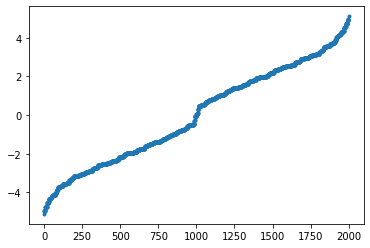

In [31]:
plt.plot(eig[0],'.')

## Periodic in x and y, open in z, no disorder

In [5]:
def H_full_per(tx,ty,m,t2,kx,ky,kz):
    h = np.zeros((2,2),dtype=np.complex_)
    h[0,1] = tx*np.cos(kx)+ty*np.cos(ky)-m +0.5*((1-t2)*np.exp(-1j*kz) + (1+t2)*np.exp(1j*kz))
    h[1,0] = np.conjugate(h[0,1])
    return h


def H_twist_z(tx,ty,m,t2,kx,ky,N,theta,W):
    h = np.zeros((2*N,2*N),dtype=np.complex_)
    for i in range(1,N-1):
        h[pares[i],impares[i]] = tx*np.cos(kx)+ty*np.cos(ky)-m + W[pares[i]]
        h[impares[i],pares[i]] = tx*np.cos(kx)+ty*np.cos(ky)-m + W[pares[i]]
        h[pares[i],impares[i+1]] = 0.5*(1-t2) + W[impares[i+1]]
        h[pares[i],impares[i-1]] = 0.5*(1+t2) + W[impares[i-1]]
        h[impares[i+1],pares[i]] = 0.5*(1-t2) + W[impares[i+1]]
        h[impares[i-1],pares[i]] = 0.5*(1+t2) + W[impares[i-1]]
        
    h[pares[0],impares[0]] = tx*np.cos(kx)+ty*np.cos(ky)-m + W[pares[0]]
    h[impares[0],pares[0]] = tx*np.cos(kx)+ty*np.cos(ky)-m + W[pares[0]]
    h[pares[0],impares[1]] = 0.5*(1-t2) + W[impares[1]]
    h[pares[0],impares[-1]] = (0.5*(1+t2) + W[impares[-1]])*np.exp(1j*theta)
    h[impares[1],pares[0]] = 0.5*(1-t2) + W[impares[1]]
    h[impares[-1],pares[0]] = (0.5*(1+t2) + W[impares[i-1]])*np.exp(-1j*theta)
    
    h[pares[-1],impares[-1]] = tx*np.cos(kx)+ty*np.cos(ky)-m + W[pares[-1]]
    h[impares[-1],pares[-1]] = tx*np.cos(kx)+ty*np.cos(ky)-m + W[pares[-1]]
    h[pares[-1],impares[0]] = (0.5*(1-t2) + W[impares[0]])*np.exp(1j*theta)
    h[pares[-1],impares[-2]] = 0.5*(1+t2) + W[impares[-2]]
    h[impares[0],pares[-1]] = (0.5*(1-t2) + W[impares[0]])*np.exp(-1j*theta)
    h[impares[-2],pares[-1]] = 0.5*(1+t2) + W[impares[-2]]
    return h

def H_cut_z(tx,ty,m,t2,kx,ky,N,W):
    h = np.zeros((2*N,2*N),dtype=np.complex_)
    for i in range(1,N-1):
        h[pares[i],impares[i]] = tx*np.cos(kx)+ty*np.cos(ky)-m + W[pares[i]]
        h[impares[i],pares[i]] = tx*np.cos(kx)+ty*np.cos(ky)-m + W[pares[i]]
        h[pares[i],impares[i+1]] = 0.5*(1-t2) + W[impares[i+1]]
        h[pares[i],impares[i-1]] = 0.5*(1+t2) + W[impares[i-1]]
        
        h[impares[i+1],pares[i]] = 0.5*(1-t2) + W[impares[i+1]]
        h[impares[i-1],pares[i]] = 0.5*(1+t2) + W[impares[i-1]]
        
    h[pares[0],impares[0]] = tx*np.cos(kx)+ty*np.cos(ky)-m + W[pares[0]]
    h[impares[0],pares[0]] = tx*np.cos(kx)+ty*np.cos(ky)-m + W[pares[0]]
    h[pares[0],impares[1]] = 0.5*(1-t2) + W[impares[1]]
    h[impares[1],pares[0]] = 0.5*(1-t2) + W[impares[1]]
    
    
    h[pares[-1],impares[-1]] = tx*np.cos(kx)+ty*np.cos(ky)-m + W[pares[-1]]
    h[impares[-1],pares[-1]] = tx*np.cos(kx)+ty*np.cos(ky)-m + W[pares[-1]]
    h[pares[-1],impares[-2]] = 0.5*(1+t2) + W[impares[-2]]
    h[impares[-2],pares[-1]] = 0.5*(1+t2) + W[impares[-2]]
    return h 

def H_per_z(tx,ty,m,t2,kx,ky,N,W):
    h = np.zeros((2*N,2*N),dtype=np.complex_)
    for i in range(N-1):
        h[pares[i],impares[i]] = tx*np.cos(kx)+ty*np.cos(ky)-m + W[pares[i]]
        h[impares[i],pares[i]] = tx*np.cos(kx)+ty*np.cos(ky)-m + W[pares[i]]
        h[pares[i],impares[i+1]] = 0.5*(1-t2) + W[impares[i+1]]
        h[pares[i],impares[i-1]] = 0.5*(1+t2) + W[impares[i-1]]
        
        h[impares[i+1],pares[i]] = 0.5*(1-t2) + W[impares[i+1]]
        h[impares[i-1],pares[i]] = 0.5*(1+t2) + W[impares[i-1]]
    
    h[pares[-1],impares[-1]] = tx*np.cos(kx)+ty*np.cos(ky)-m + W[pares[-1]]
    h[impares[-1],pares[-1]] = tx*np.cos(kx)+ty*np.cos(ky)-m + W[pares[-1]]
    h[pares[-1],impares[0]] = 0.5*(1-t2) + W[impares[0]]
    h[pares[-1],impares[-2]] = 0.5*(1+t2) + W[impares[-2]]
        
    h[impares[0],pares[-1]] = 0.5*(1-t2) + W[impares[0]]
    h[impares[-2],pares[-1]] = 0.5*(1+t2) + W[impares[-2]]
    return h 

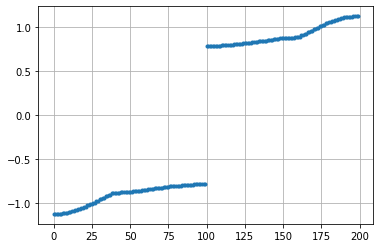

In [3]:
tx = 1.1
ty = 0.9
t2 = 0.8
m = 2.12
kz = np.linspace(-np.pi,np.pi,100)
eig = []
for k3 in kz:
    h = H_full_per(tx,ty,m,t2,0.,0.,k3)
    eigen_vals = np.linalg.eigh(h)[0]
    for i in eigen_vals:
        eig.append(i)
plt.plot(np.sort(eig),'.')
plt.grid()
plt.show()

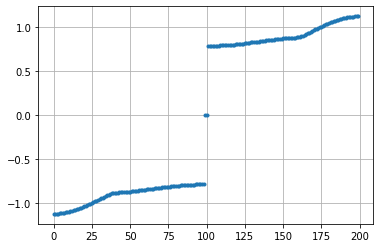

In [4]:
N = 100
W = 0.
tx = 1.1
ty = 0.9
t2 = 0.8
m = 2.12
dis = np.random.uniform(-W/2,W/2,2*N)
pares = np.arange(0,2*N,2)
impares = pares+1
h = H_cut_z(tx,ty,m,t2,0.,0.,N,dis)
eigen_vals = np.linalg.eigh(h)[0]
plt.plot(eigen_vals,'.')
plt.grid()
plt.show()

In [12]:
N = 100
W = 0.
tx = 1.1
ty = 0.9
t2 = 0.8
m = 2.12
dis = np.random.uniform(-W/2,W/2,2*N)
pares = np.arange(0,2*N,2)
impares = pares+1
kx = np.linspace(-np.pi,np.pi,20)
ky = np.linspace(-np.pi,np.pi,20)


delta_E = 0.1
pos = np.arange(0,tx+ty+t2+m+W/2+delta_E,delta_E)
neg = np.sort(-np.arange(delta_E,tx+ty+t2+m+W/2+delta_E,delta_E))
bins = np.concatenate((neg, pos))
new_bins = 0.*bins

counts = 0.*bins

for i in range(len(bins)-1):
    new_bins[i] = (bins[i]+bins[i+1])/2
    
    
for j in range(len(counts)-1):
    en1 = bins[j]
    en2 = bins[j+1]
    for k1 in kx:
        for k2 in kx:
            ham = H_cut_z(tx,ty,m,t2,k1,k2,N,dis)
            eigen_vals = np.linalg.eigh(ham)[0]
            for eig in eigen_vals:
                if eig<en2 and eig>en1:
                    counts[j] += 1
                    
dos = counts/(2*N*len(kx)*len(kx)*delta_E)
print(np.sum(dos)*delta_E)

0.9955


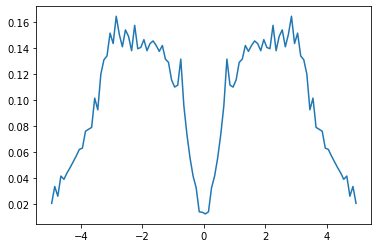

In [13]:
plt.plot(new_bins[:-1],dos[:-1])

In [31]:
N = 100
W = 0.
tx = 1.1
ty = 0.9
t2 = 0.8
m = 2.12
dis = np.random.uniform(-W/2,W/2,2*N)
pares = np.arange(0,2*N,2)
impares = pares+1
kx = np.linspace(-np.pi,np.pi,50)
ky = np.linspace(-np.pi,np.pi,50)


delta_E = 0.01
counts = 0
    

for k1 in kx:
    for k2 in kx:
        ham = H_per_z(tx,ty,m,t2,k1,k2,N,dis)
        eigen_vals = np.linalg.eigh(ham)[0]
        for eig in eigen_vals:
            if eig<delta_E and eig>-delta_E:
                counts += 1
                    
dos = counts/(2*N*len(kx)*len(kx)*delta_E)
dos

0.0048

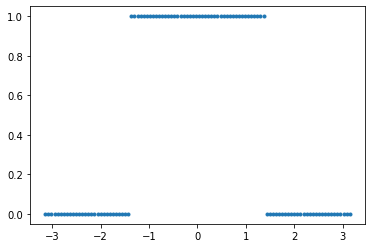

In [24]:
N = 10
M = N
L = 10
w = 0.
thetas = np.arange(0,2*np.pi,2*np.pi/L)
dtheta = (2*np.pi)/L
dis = np.random.uniform(-w/2,w/2,2*N)

pares = np.arange(0,2*N,2)
impares = pares+1

kx = np.linspace(-np.pi,np.pi,100)
ky = 0.
windings = []


for k1 in kx:

    h = H_twist_z(1.1,0.9,2.12,0.8,k1,ky,N,0.,dis)
    vec = np.linalg.eigh(h)[1]
        
       
    phi01 = (np.linalg.eigh(h)[1])[:,:M]
    c1 = np.identity(M)
    c_new1 = np.identity(M)
    bi = phi01.copy()
    for theta in thetas[:-1]:
        phi1 = (np.linalg.eigh(H_twist_z(1.1,0.9,2.12,0.8,k1,ky,N,theta+dtheta,dis))[1])[:,:M]
        c_new1 = np.matmul(c1,np.matmul(np.conjugate(phi01).T,phi1))
        phi01 = phi1
        c1 = c_new1
    c_new1 = np.matmul(c1,np.matmul(np.conjugate(phi01).T,bi))
    eigen1 = np.linalg.eigvals(c_new1)
    wind = (1/np.pi)*np.abs(np.sum(np.arctan2(np.imag(eigen1),np.real(eigen1))))
    windings.append(wind)
plt.plot(kx,windings,'.')

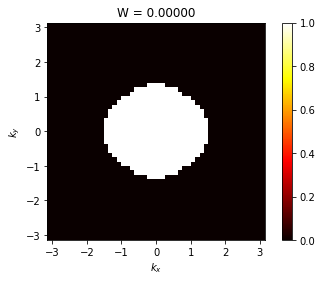

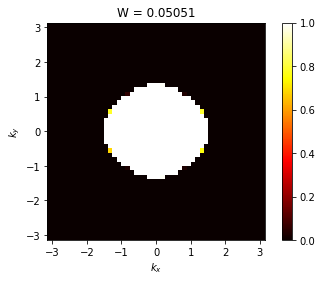

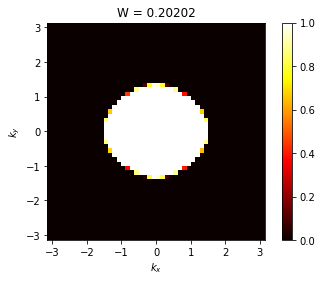

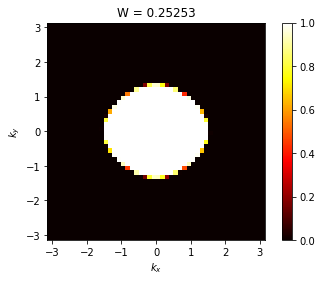

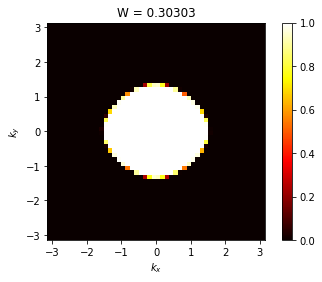

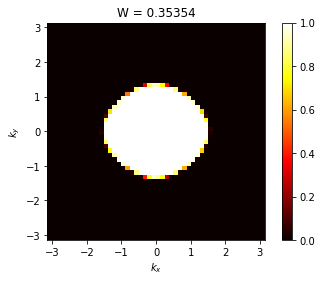

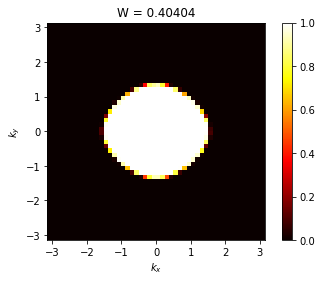

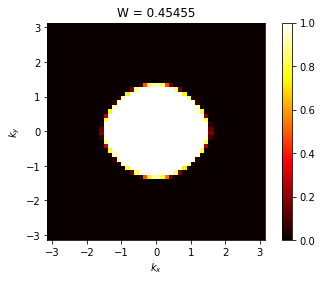

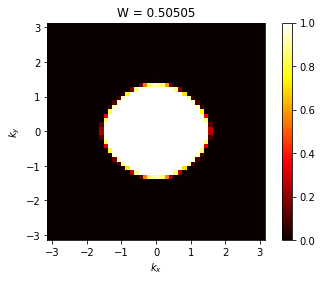

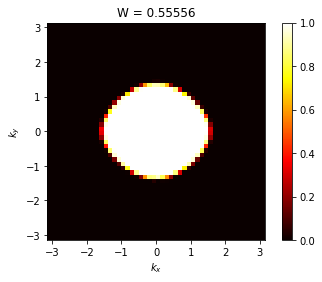

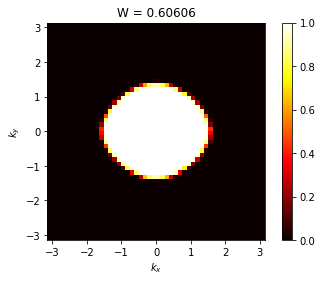

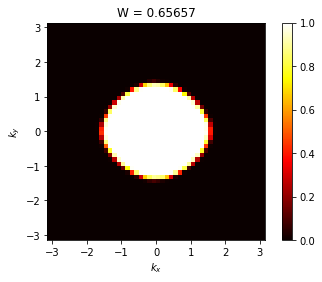

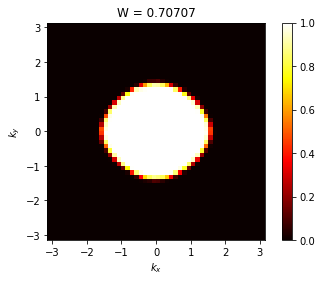

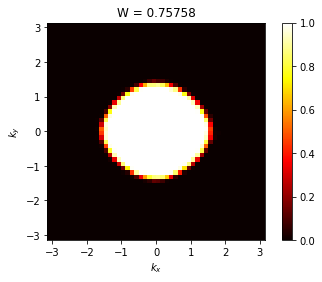

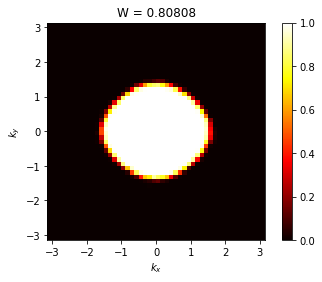

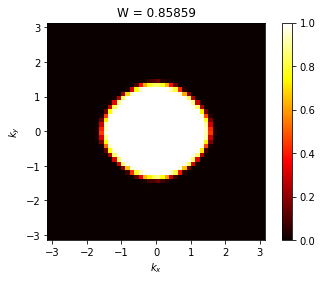

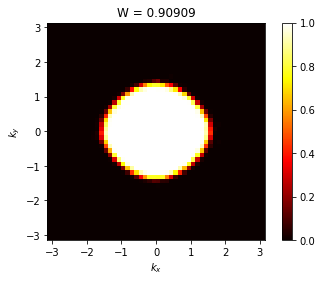

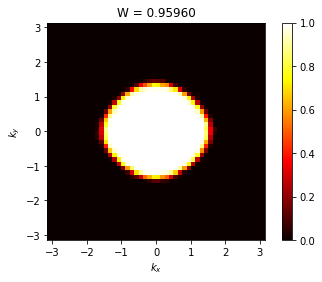

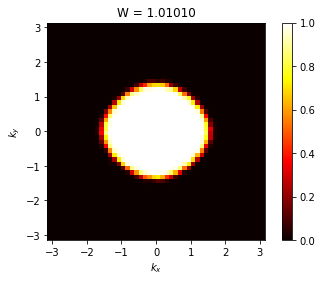

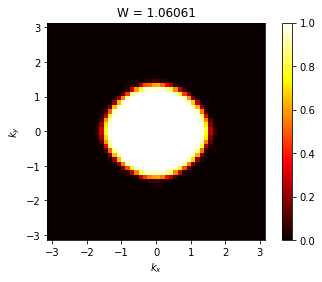

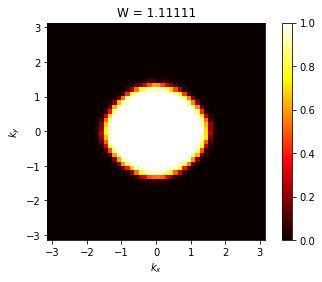

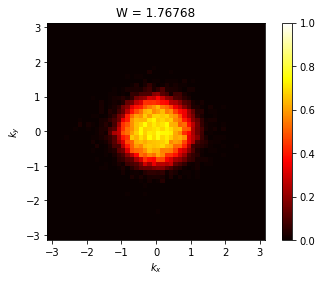

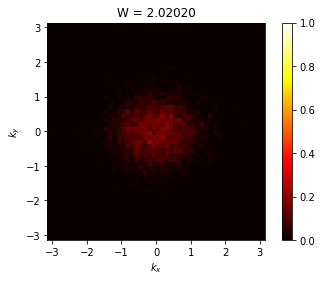

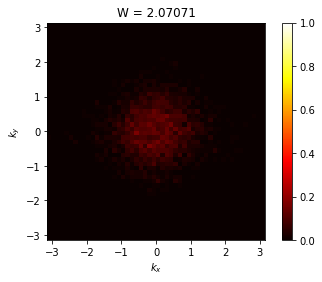

OSError: H_per_cut_wind_200_2.12121_100.dat not found.

In [38]:
desordem = np.linspace(0,5,100)


desordem = np.delete(desordem,[2,3,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39])

realizacoes = 200

len_kx = 50

len_ky = 50

wind_00_100 = []
frac = []

index = 0
N = 100
for dis in desordem:
    count = 0
    kx, ky, niu = np.loadtxt('H_per_cut_wind_{}_{:.5f}_{}.dat'.format(realizacoes,dis,N),unpack=True)
    for n in niu:
        if 0.99<n<1.01:
            count +=1
    frac.append(count/(len_kx*len_ky))
    wind_00_100.append(niu[25*50+25])
    matrix = np.zeros((len_kx,len_ky),dtype=float)
    for i, j in enumerate(niu):
        matrix[i // 50, i % 50] = j
    plt.imshow(matrix,extent=[-np.pi,np.pi,-np.pi,np.pi],cmap='hot')
    plt.colorbar()
    plt.clim(0,1)
    plt.title('W = {:.5f}'.format(dis))
    plt.xlabel('$k_x$')
    plt.ylabel('$k_y$')
    plt.show()

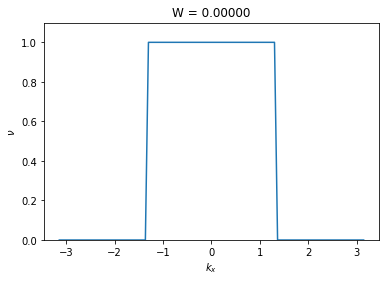

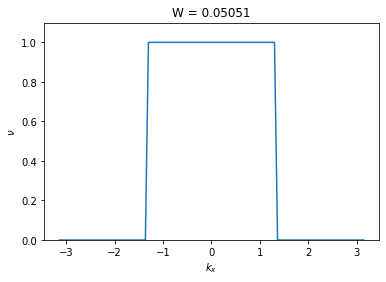

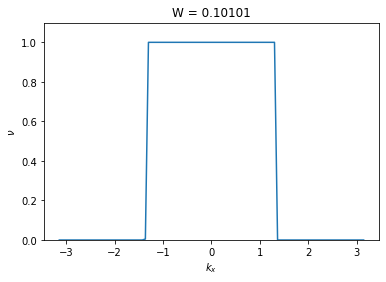

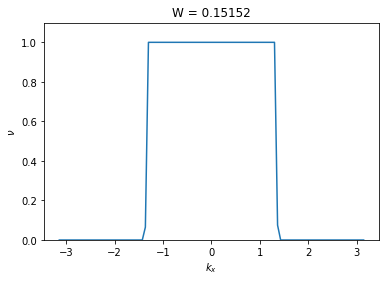

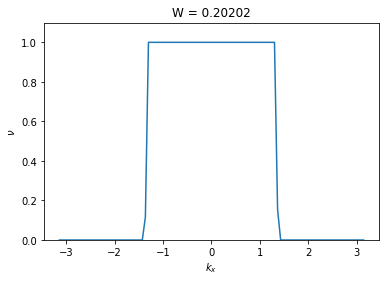

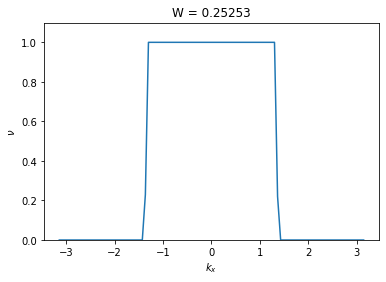

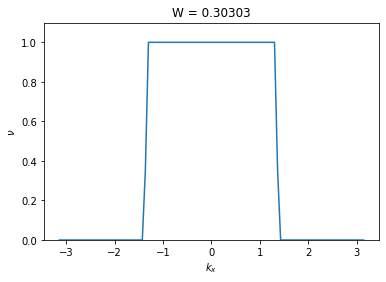

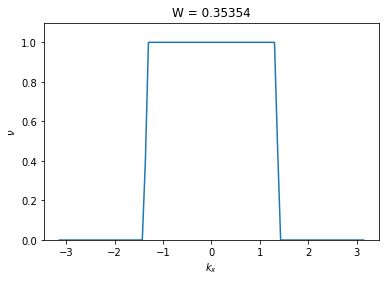

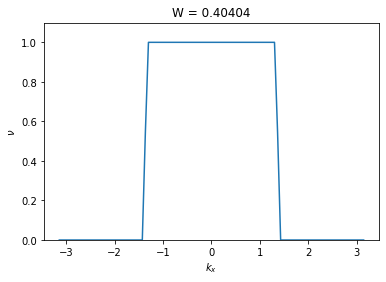

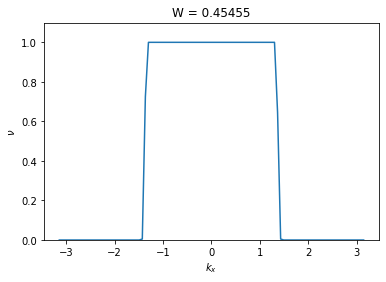

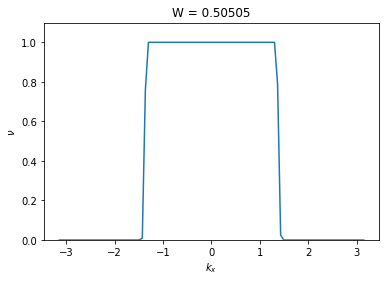

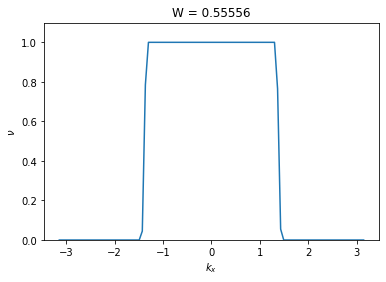

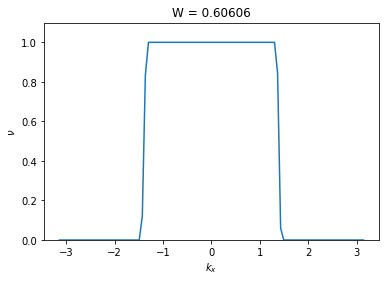

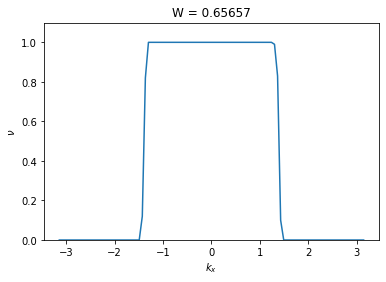

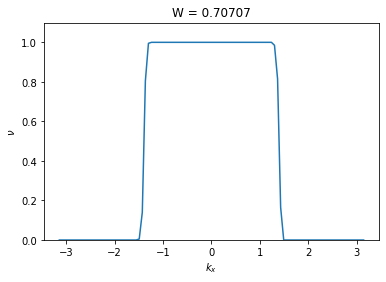

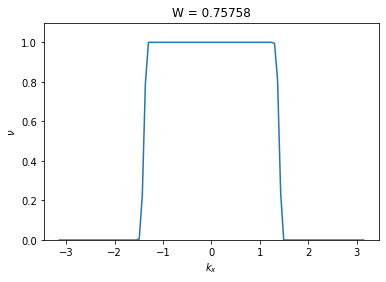

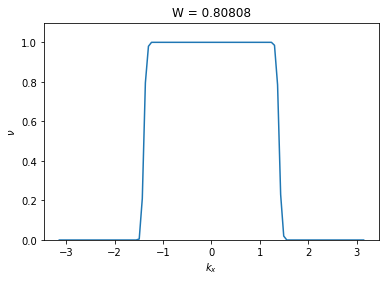

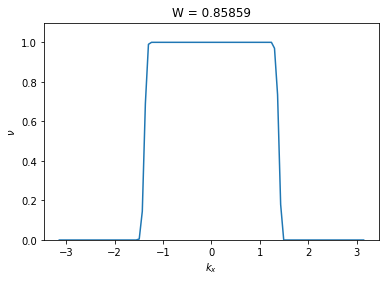

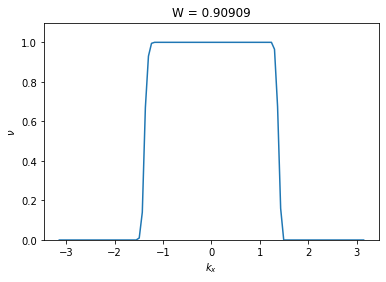

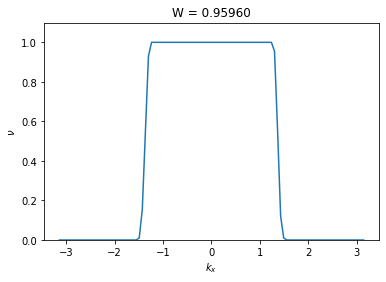

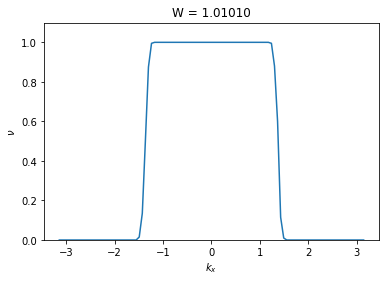

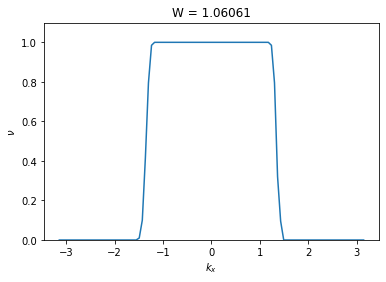

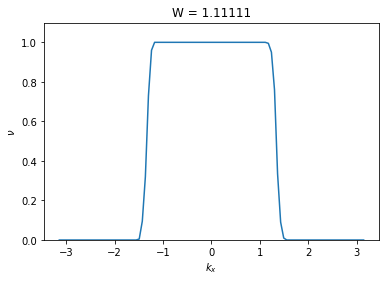

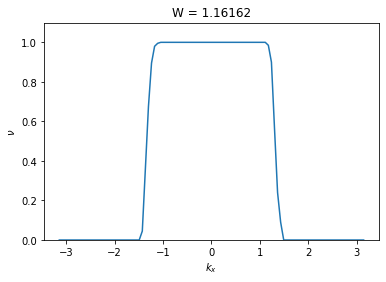

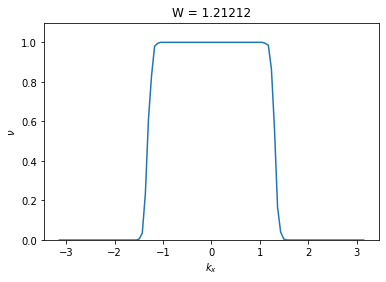

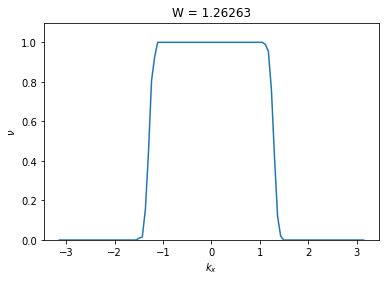

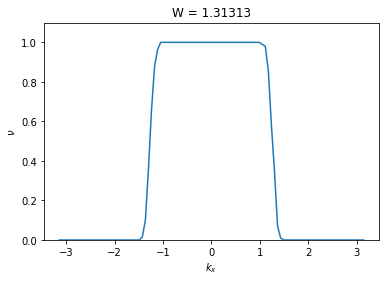

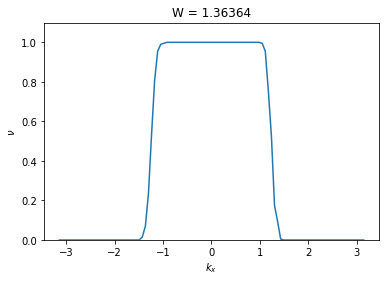

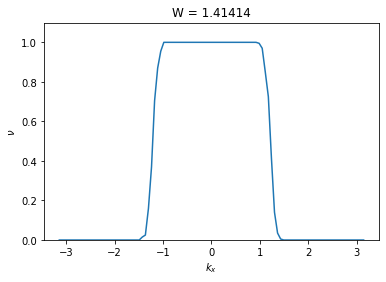

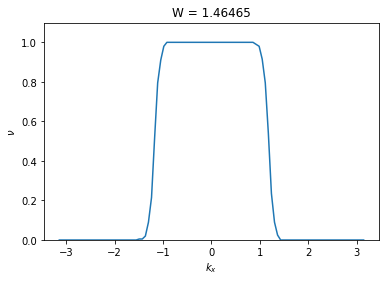

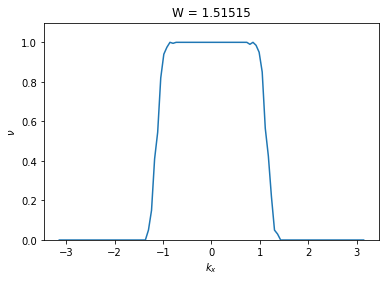

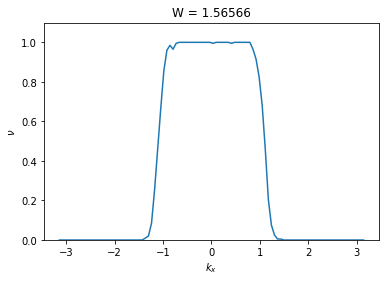

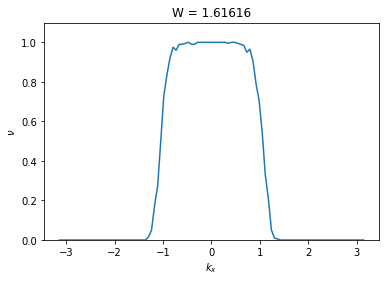

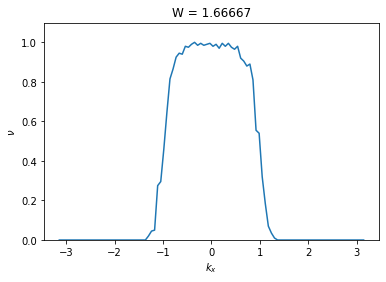

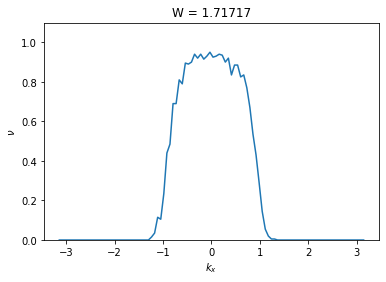

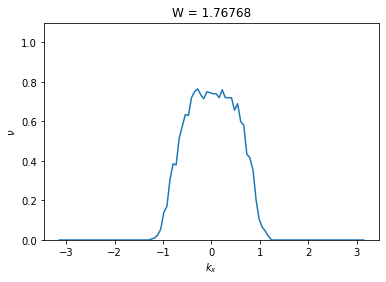

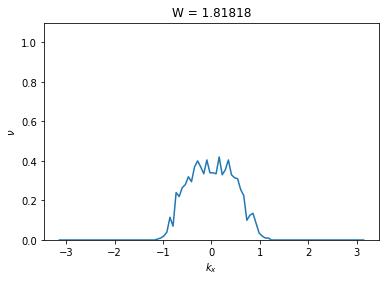

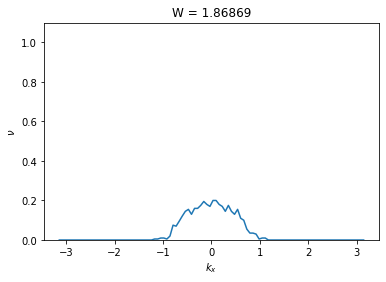

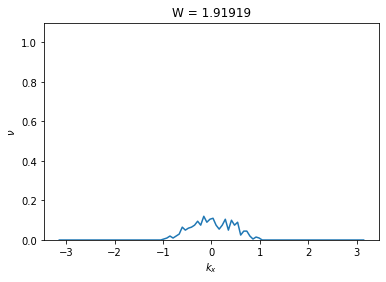

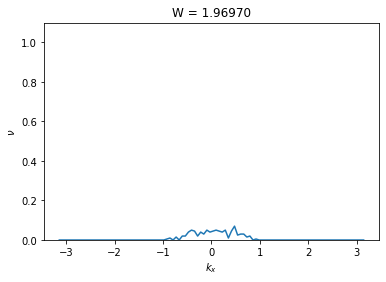

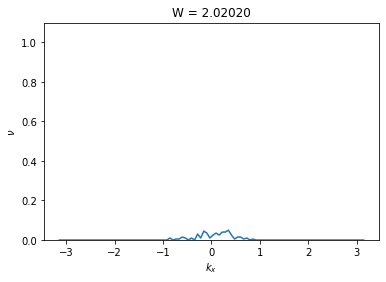

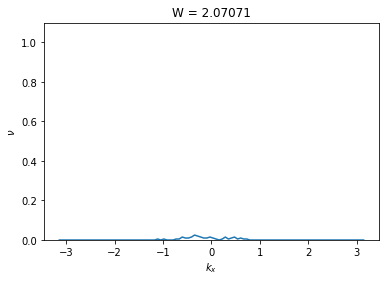

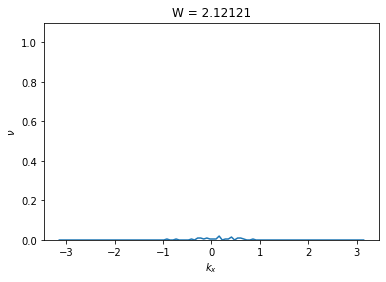

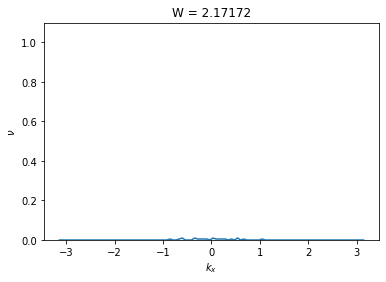

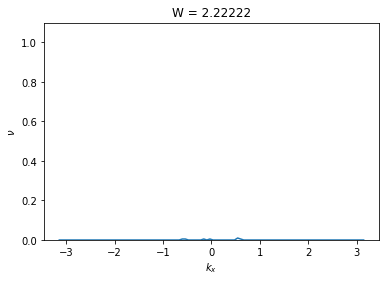

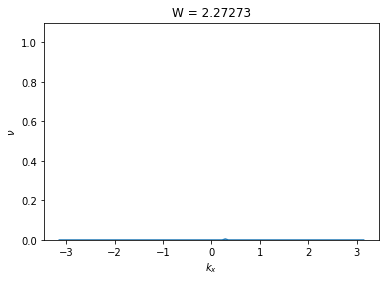

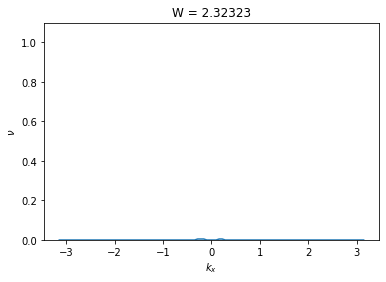

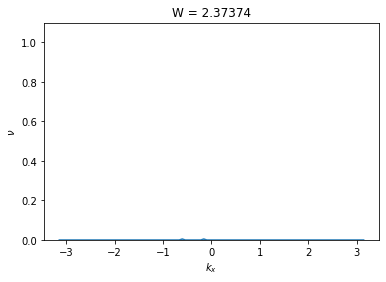

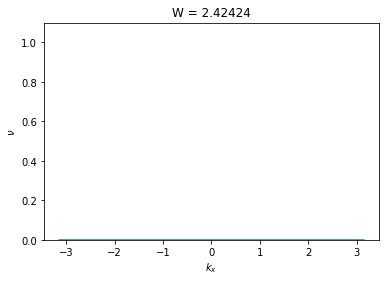

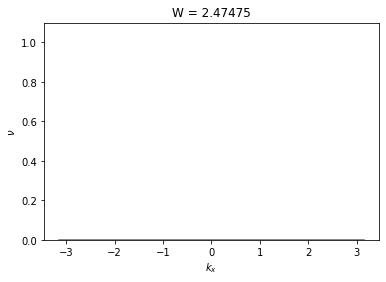

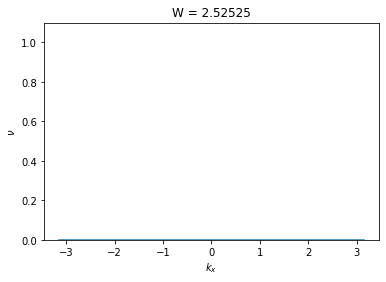

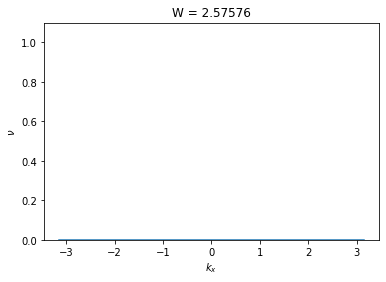

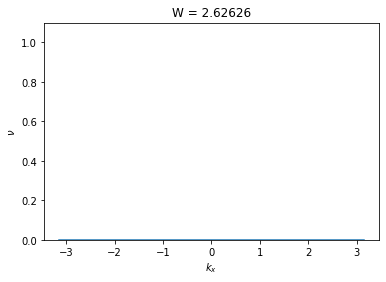

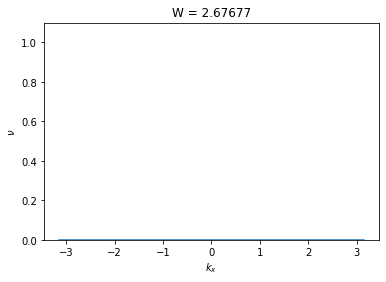

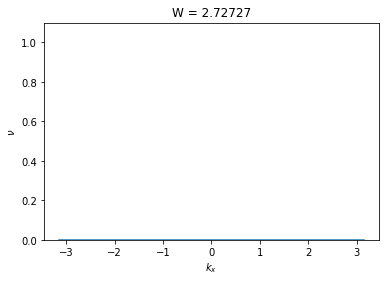

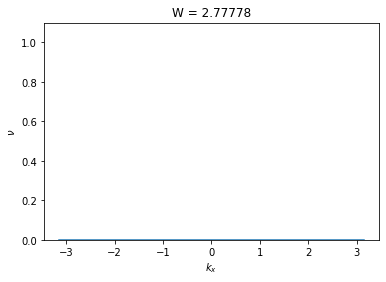

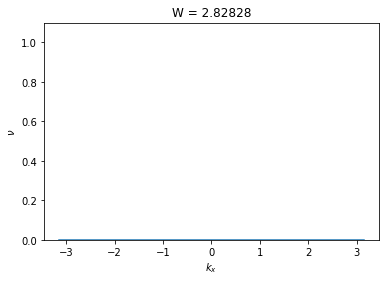

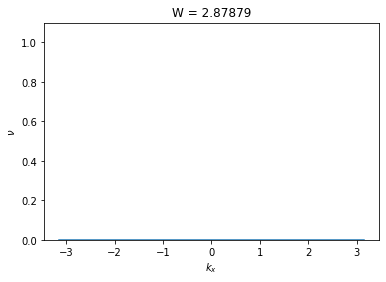

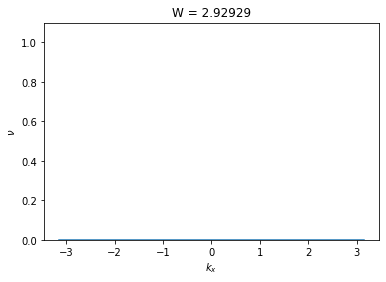

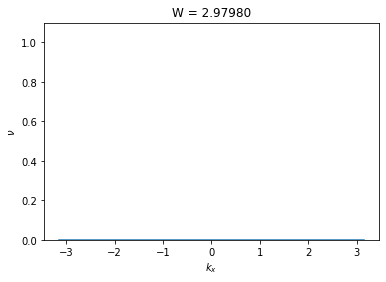

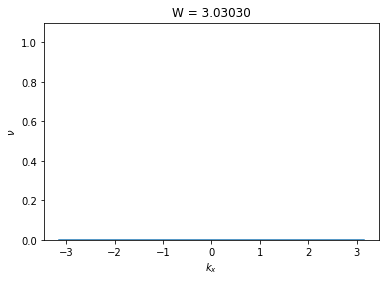

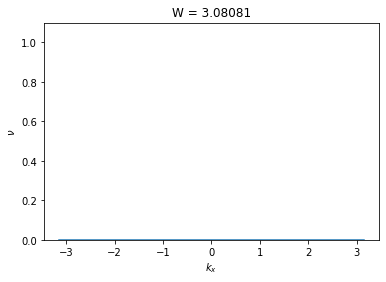

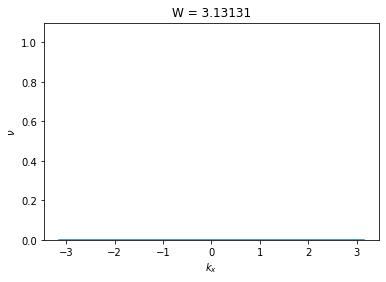

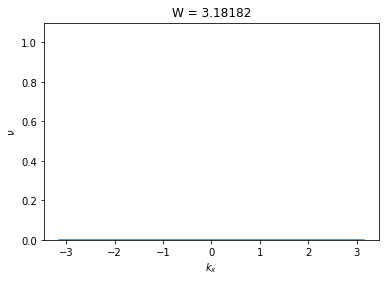

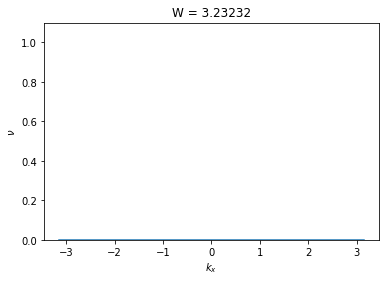

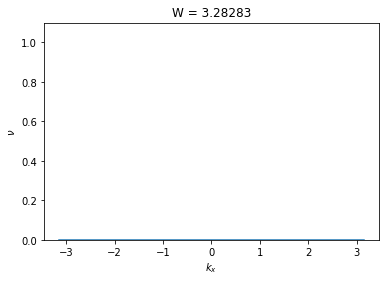

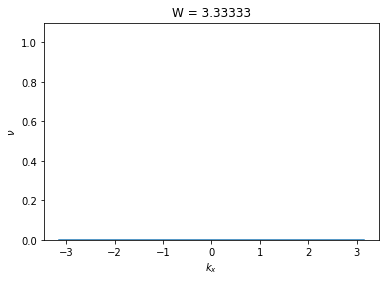

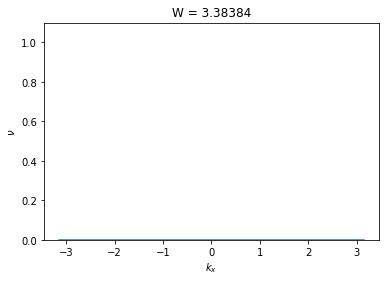

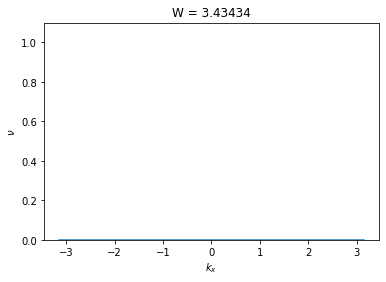

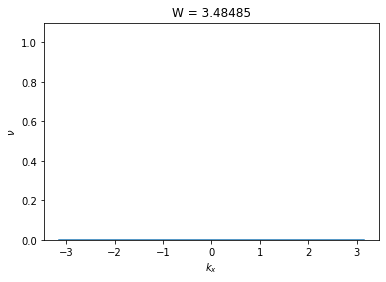

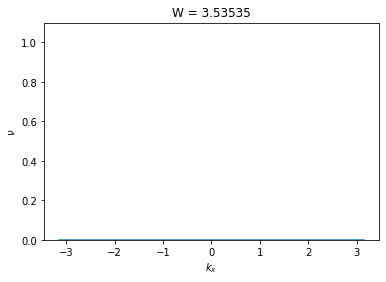

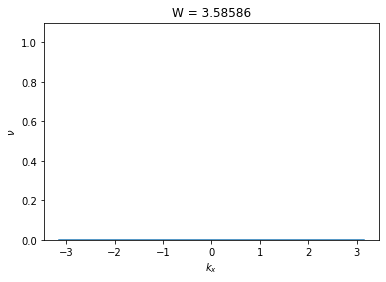

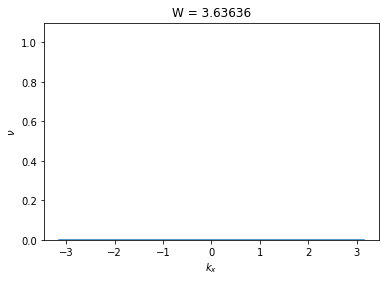

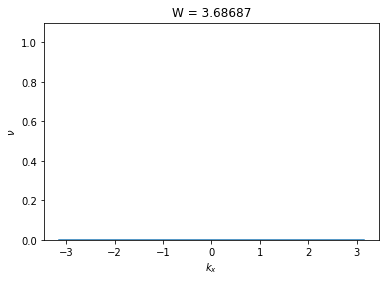

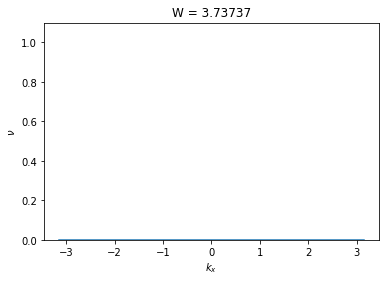

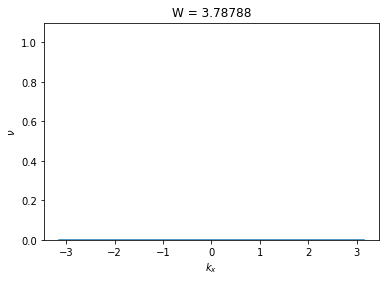

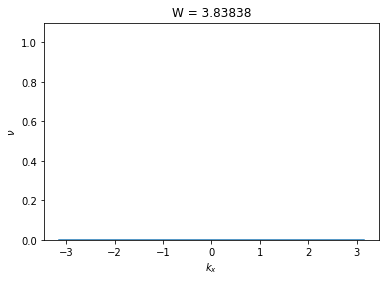

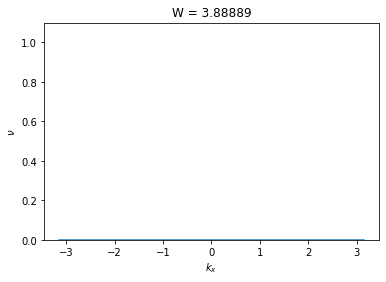

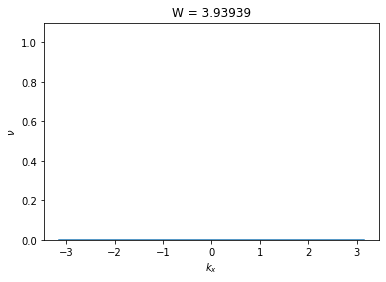

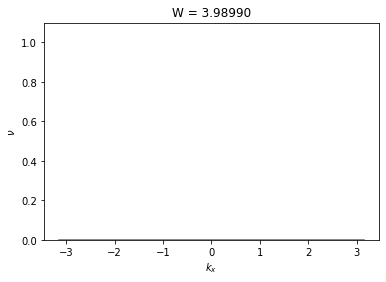

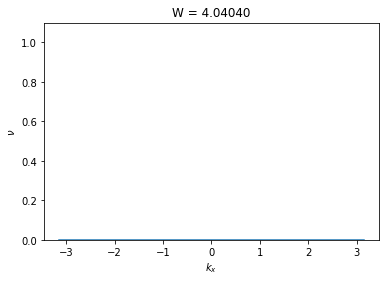

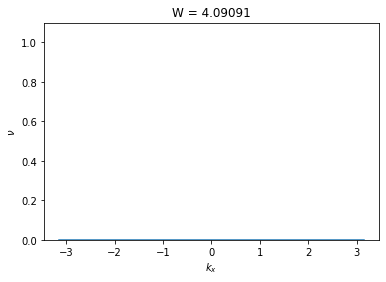

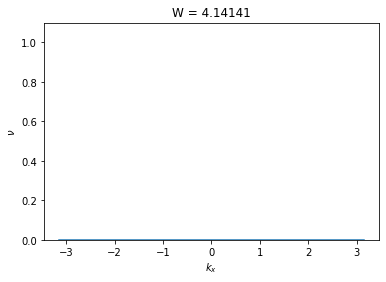

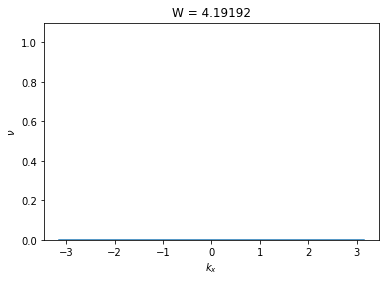

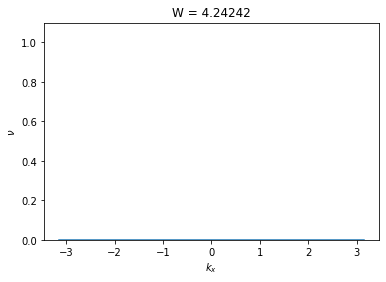

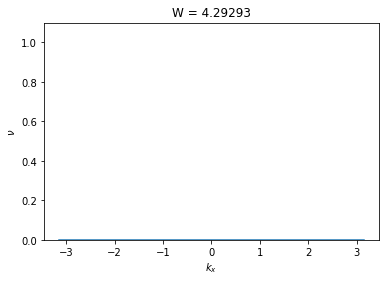

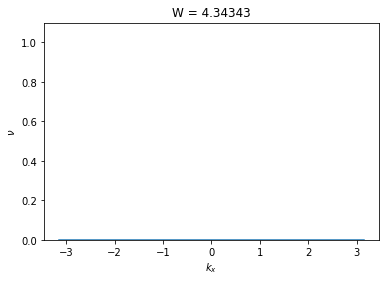

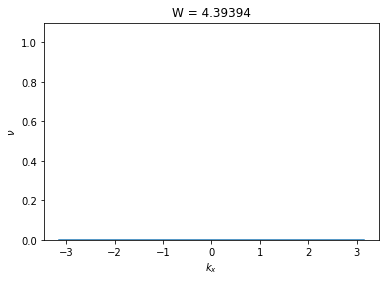

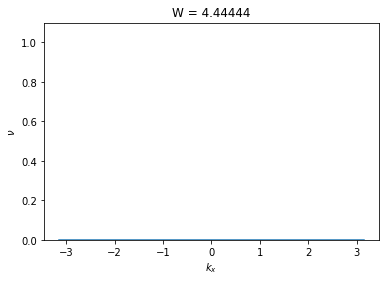

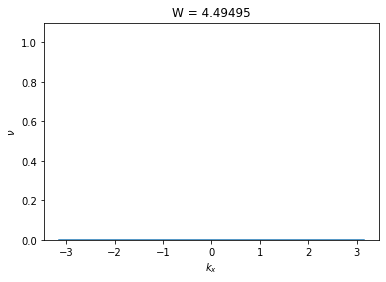

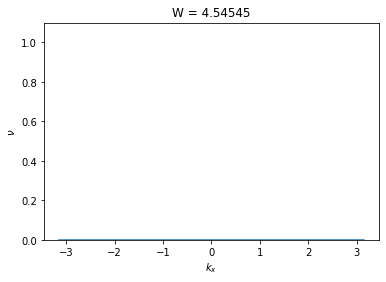

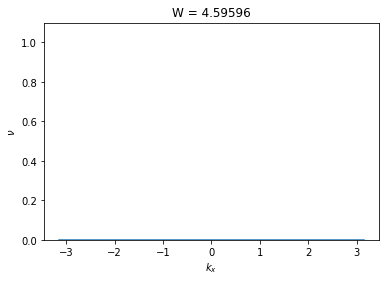

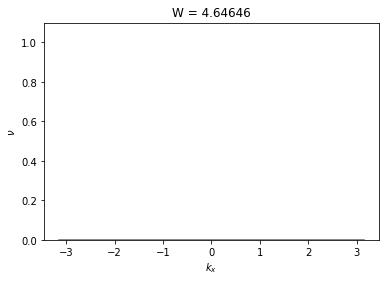

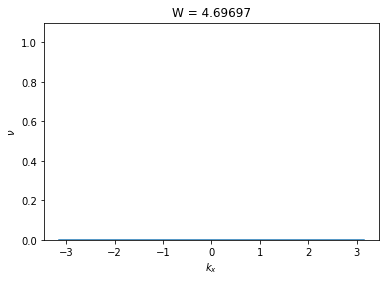

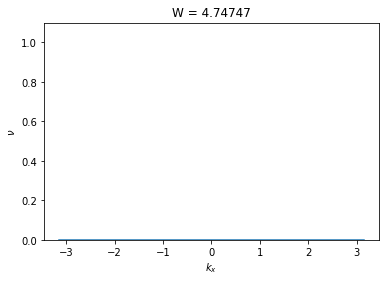

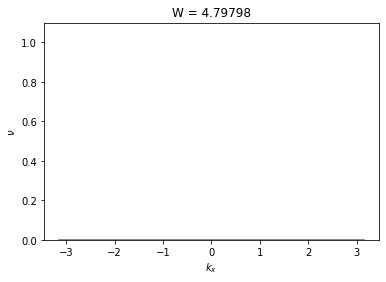

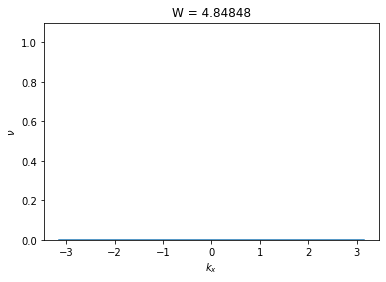

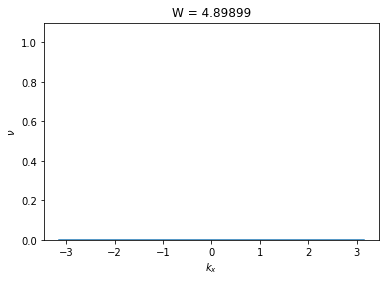

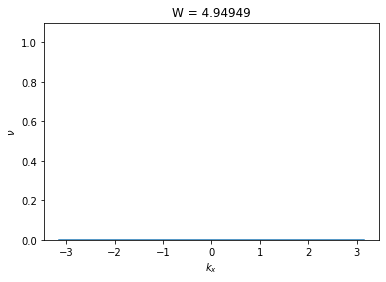

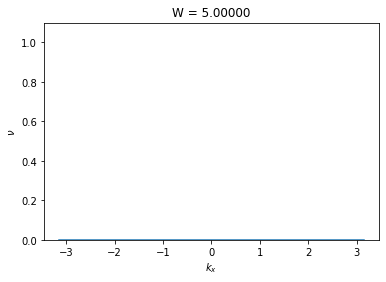

In [113]:
desordem = np.linspace(0,5,100)



realizacoes = 200
wind_00_200 = []



N = 200
for dis in desordem:
    kx, niu, dev = np.loadtxt('H_per_cut_wind_{}_{:.5f}_{}.dat'.format(realizacoes,dis,N),unpack=True)
    wind_00_200.append(niu[49])
    plt.plot(kx,niu,'-')
    plt.title('W = {:.5f}'.format(dis))
    plt.xlabel('$k_x$')
    plt.ylabel(r'$\nu$')
    plt.ylim(0,1.1)
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (70,) and (24,)

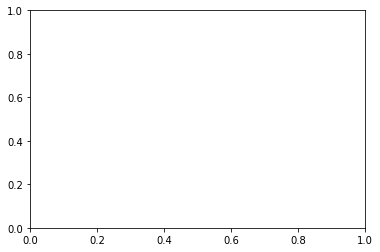

In [39]:
plt.plot(desordem[0:70],wind_00_100,label='N = 100')
plt.plot(desordem,wind_00_200,label='N = 200')
plt.xlabel('$W$')
plt.ylabel(r'$\nu$')
plt.title(r'Winding number for $k_x$ and $k_y$ near (0,0)')
plt.legend()

## Periodic in x and y, finite in z, with disorder

In [6]:
#PBC=True if periodic boundary conditions, PBC=False for random twists  
def matrixBTwistsTransInv_cut(Lx,Ly,Lz,tx,ty,t2,m,W,PBC):
	dtypein=complex
	row=np.empty([16*Lx*Ly*Lz -4*Lx*Ly])
	col=np.empty([16*Lx*Ly*Lz -4*Lx*Ly])
	data=np.empty([16*Lx*Ly*Lz -4*Lx*Ly],dtype=dtypein)
	

	if(PBC==True):
		thetax=thetay=thetaz=0
	else:
		thetax=complex(0,random.random()*2*np.pi)
		thetay=complex(0,random.random()*2*np.pi)
		thetaz=complex(0,random.random()*2*np.pi)
				
	index=0
    
    # Z=0
	for y in range(Ly):
		for x in range(Lx):

			# Anderson disorder (different in each sublattice)
			disA=random.random()*W-W/2
			disB=random.random()*W-W/2
				
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			data[index]=disA
			index+=1
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,0)
			data[index]=disB
			index+=1							
				
			# same site hopping between orbitals A and B (m)
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,0)
			data[index]=-m
			index+=1			
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			data[index]=-m
			index+=1					

			#HOPPINGS
				
			arrayNN=f(Lx,Ly,Lz,x,y,0)# array with coordinates of NN
				
			#xhoppings
			neigIndex1=0
			neigIndex2=1
			xhoppingright=tx*np.exp(thetax/Lx)/2.
			xhoppingleft=tx*np.exp(-thetax/Lx)/2.			

			#neig left
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			data[index]=xhoppingleft
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			data[index]=xhoppingleft.conjugate()
			index+=1	
				
			#neig right
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			data[index]=xhoppingright
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			data[index]=xhoppingright.conjugate()
			index+=1	

				

			#yhoppings
			neigIndex1=2
			neigIndex2=3
			yhoppingright=ty*np.exp(thetay/Ly)/2.
			yhoppingleft=ty*np.exp(-thetay/Ly)/2.				
				
			#neig left
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			data[index]=yhoppingleft
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			data[index]=yhoppingleft.conjugate()
			index+=1	
				
			#neig right
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			data[index]=yhoppingright
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			data[index]=yhoppingright.conjugate()
			index+=1


				
			#zhoppings
			neigIndex2=5
			zhoppingup=(1-t2)*np.exp(thetaz/Lz)/2.

			
	
				
			#neig up
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			data[index]=zhoppingup
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			data[index]=zhoppingup.conjugate()
			index+=1
            
    
    
	for z in range(1,Lz-1):
		for y in range(Ly):
			for x in range(Lx):

				# Anderson disorder (different in each sublattice)
				disA=random.random()*W-W/2
				disB=random.random()*W-W/2
				
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=disA
				index+=1
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,z)
				data[index]=disB
				index+=1							
				
				# same site hopping between orbitals A and B (m)
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,z)
				data[index]=-m
				index+=1			
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=-m
				index+=1					

				#HOPPINGS
				
				arrayNN=f(Lx,Ly,Lz,x,y,z)# array with coordinates of NN
				
				#xhoppings
				neigIndex1=0
				neigIndex2=1
				xhoppingright=tx*np.exp(thetax/Lx)/2.
				xhoppingleft=tx*np.exp(-thetax/Lx)/2.			

				#neig left
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				data[index]=xhoppingleft
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=xhoppingleft.conjugate()
				index+=1	
				
				#neig right
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				data[index]=xhoppingright
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=xhoppingright.conjugate()
				index+=1	

				

				#yhoppings
				neigIndex1=2
				neigIndex2=3
				yhoppingright=ty*np.exp(thetay/Ly)/2.
				yhoppingleft=ty*np.exp(-thetay/Ly)/2.				
				
				#neig left
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				data[index]=yhoppingleft
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=yhoppingleft.conjugate()
				index+=1	
				
				#neig right
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				data[index]=yhoppingright
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=yhoppingright.conjugate()
				index+=1


				
				#zhoppings
				neigIndex1=4
				neigIndex2=5
				zhoppingup=(1-t2)*np.exp(thetaz/Lz)/2.
				zhoppingdown=(1+t2)*np.exp(-thetaz/Lz)/2.
				
				#neig down
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				data[index]=zhoppingdown
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=zhoppingdown.conjugate()
				index+=1		
				
				#neig up
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				data[index]=zhoppingup
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=zhoppingup.conjugate()
				index+=1	

            
    # Z=L-1
	for y in range(Ly):
		for x in range(Lx):

			# Anderson disorder (different in each sublattice)
			disA=random.random()*W-W/2
			disB=random.random()*W-W/2
				
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			data[index]=disA
			index+=1
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,Lz-1)
			data[index]=disB
			index+=1							
				
			# same site hopping between orbitals A and B (m)
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,Lz-1)
			data[index]=-m
			index+=1			
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			data[index]=-m
			index+=1					

			#HOPPINGS
				
			arrayNN=f(Lx,Ly,Lz,x,y,Lz-1)# array with coordinates of NN
				
			#xhoppings
			neigIndex1=0
			neigIndex2=1
			xhoppingright=tx*np.exp(thetax/Lx)/2.
			xhoppingleft=tx*np.exp(-thetax/Lx)/2.			

			#neig left
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			data[index]=xhoppingleft
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			data[index]=xhoppingleft.conjugate()
			index+=1	
				
			#neig right
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			data[index]=xhoppingright
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			data[index]=xhoppingright.conjugate()
			index+=1	

				

			#yhoppings
			neigIndex1=2
			neigIndex2=3
			yhoppingright=ty*np.exp(thetay/Ly)/2.
			yhoppingleft=ty*np.exp(-thetay/Ly)/2.				
				
			#neig left
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			data[index]=yhoppingleft
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			data[index]=yhoppingleft.conjugate()
			index+=1	
				
			#neig right
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			data[index]=yhoppingright
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			data[index]=yhoppingright.conjugate()
			index+=1


				
			#zhoppings
			neigIndex1=4
			zhoppingdown=(1+t2)*np.exp(-thetaz/Lz)/2.
			
			#neig down
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			data[index]=zhoppingdown
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			data[index]=zhoppingdown.conjugate()
			index+=1		
				
	mtx = sparse.csc_matrix((data, (row, col)), shape=(2*Lx*Ly*Lz, 2*Lx*Ly*Lz), dtype=dtypein)

	return mtx.toarray()

In [33]:
A2 = matrixBTwistsTransInv_cut(10,10,10,1.1,0.9,0.8,2.12,0.,PBC=True)
eig2 = np.linalg.eigh(A2)

(-0.1, 0.1)

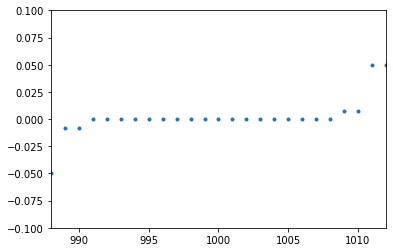

In [34]:
plt.plot(eig2[0],'.')
plt.xlim(988,1012)
plt.ylim(-0.1,0.1)

# LDOS

## OBC

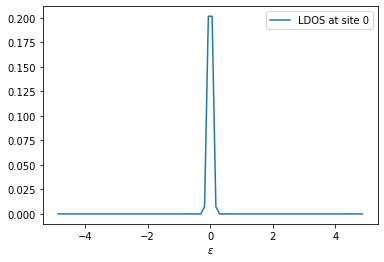

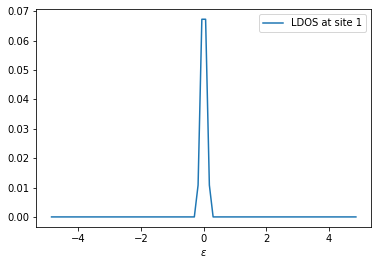

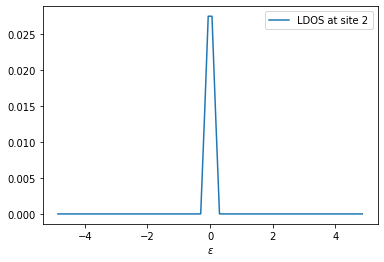

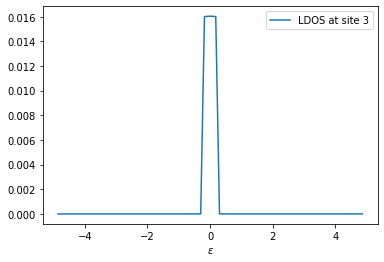

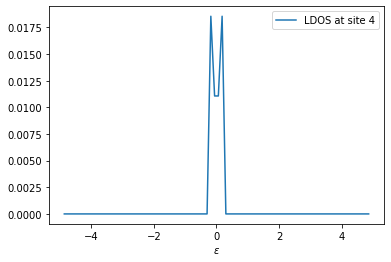

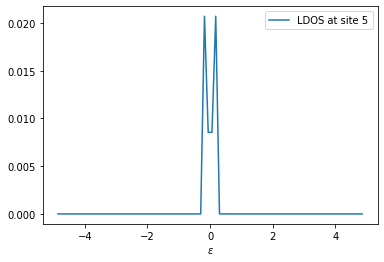

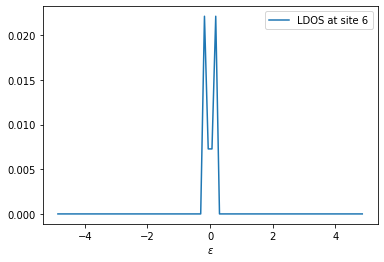

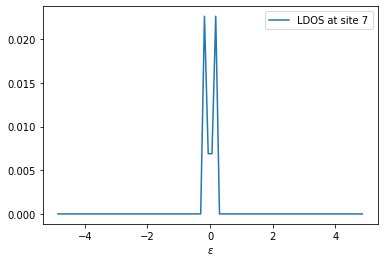

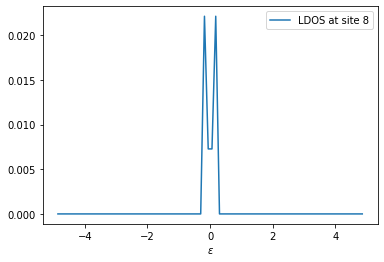

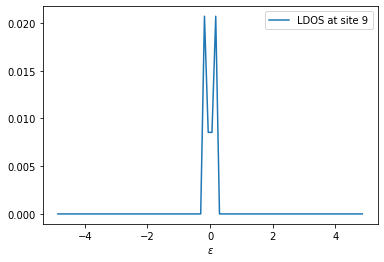

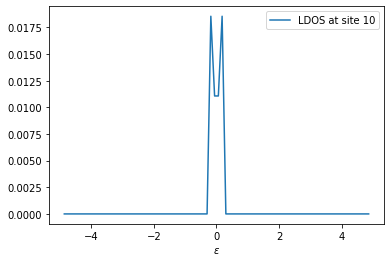

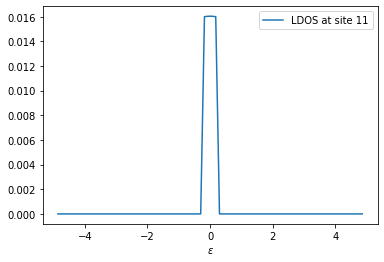

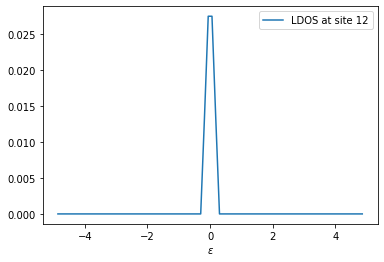

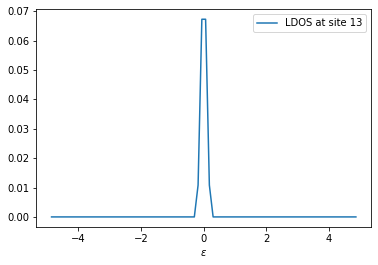

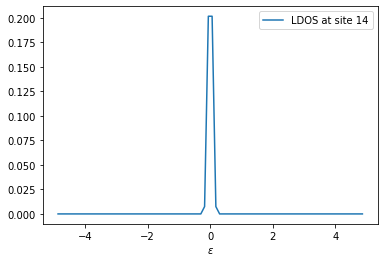

In [31]:

dis = 0.
tx = 1.1
ty = 0.9
t2 = 0.8
m = 2.12


L = 15

zes = np.arange(0,L,1)


delta_E = 0.12
pos = np.arange(0,tx+ty+t2+m+dis/2+delta_E,delta_E)
neg = np.sort(-np.arange(delta_E,tx+ty+t2+m+dis/2+delta_E,delta_E))
bins = np.concatenate((neg, pos))
new_bins = 0.*bins

for i in range(len(bins)-1):
    new_bins[i] = (bins[i]+bins[i+1])/2
    
h = matrixBTwistsTransInv_cut(L,tx,ty,t2,m,dis,PBC=True)


eig, vec = sla.eigsh(h,100, sigma = 0., which='LM')


for z in zes:
    amps = 0.*bins
    for j in range(len(amps)-1):
        en1 = bins[j]
        en2 = bins[j+1]
        for dunno in range(len(eig)):
            if eig[dunno]<en2 and eig[dunno]>en1:
                for gamma in [0,1]:
                    for x in range(0,L):
                        for y in range(0,L):
                            ind = matrixIndexOrb(L,gamma,x,y,z)
                            amps[j] += np.abs(vec[ind,dunno])**2
                    



    plt.plot(new_bins[:-1],(1/(2*L*L*delta_E))*amps[:-1],label='LDOS at site '+str(z))
    plt.xlabel('$\epsilon$')

    plt.legend()
    plt.show()

In [32]:
dis = 0.
tx = 1.1
ty = 0.9
t2 = 0.8
m = 2.12


L = 15

z = 0

window = [-0.0001,0.0001]

window_states = 0.


    
h = matrixBTwistsTransInv_cut(L,tx,ty,t2,m,dis,PBC=True)


eig, vec = sla.eigsh(h,100, sigma = 0., which='LM')

print(np.amax(eig),np.amin(eig))
delta_E = np.amax(eig)-np.amin(eig)

for dunno in range(len(eig)):
    if eig[dunno] < window[-1] and eig[dunno] > window[0]:
        for gamma in [0,1]:
            for x in range(0,L):
                for y in range(0,L):
                    ind = matrixIndexOrb(L,gamma,x,y,z)
                    window_states += np.abs(vec[ind,dunno])**2
(1/(2*L*L))*window_states

0.236039321689038 -0.23335762874758495


0.03805672905297015

## CBC

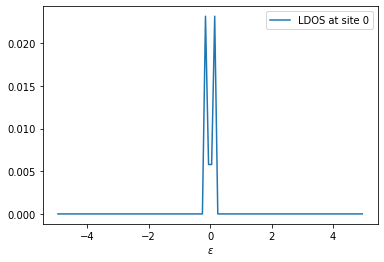

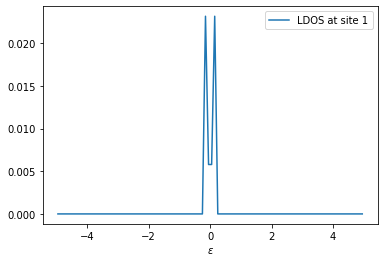

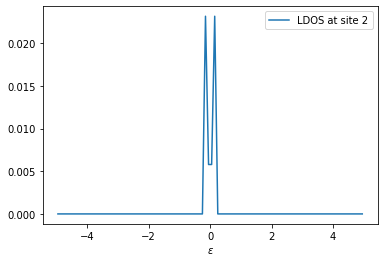

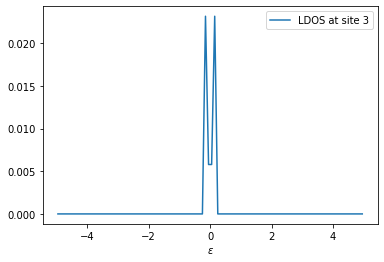

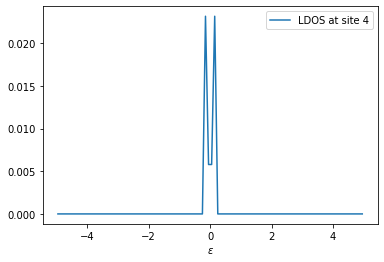

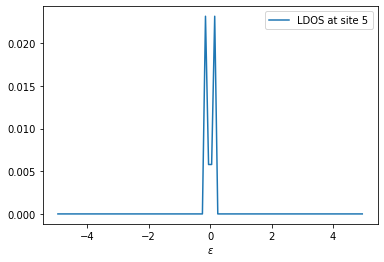

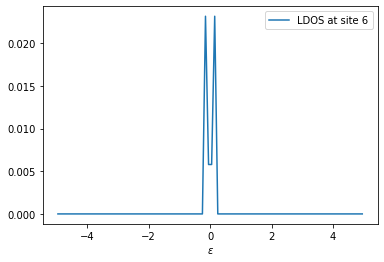

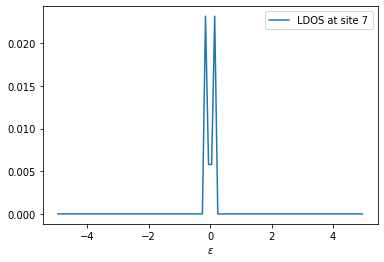

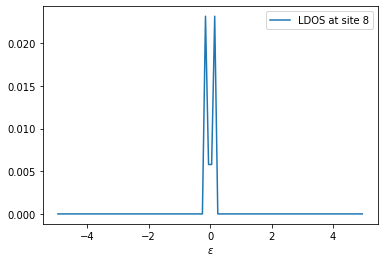

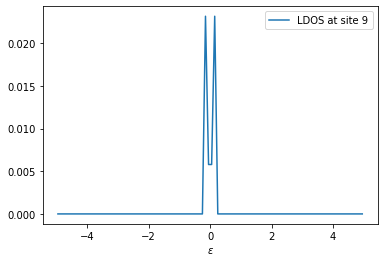

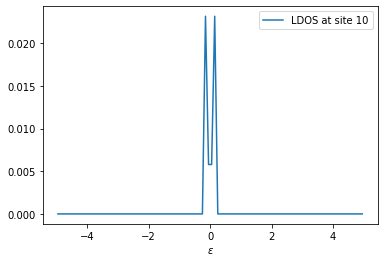

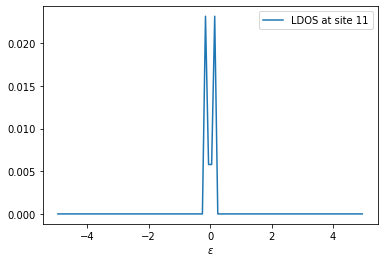

In [10]:
dis = 0.
tx = 1.1
ty = 0.9
t2 = 0.8
m = 2.12


L = 12

zes = np.arange(0,L,1)


delta_E = 0.1
pos = np.arange(0,tx+ty+t2+m+dis/2+delta_E,delta_E)
neg = np.sort(-np.arange(delta_E,tx+ty+t2+m+dis/2+delta_E,delta_E))
bins = np.concatenate((neg, pos))
new_bins = 0.*bins

for i in range(len(bins)-1):
    new_bins[i] = (bins[i]+bins[i+1])/2
    
h = matrixBTwistsTransInv(L,t2,m,dis,PBC=True)



eig, vec = sla.eigsh(h,20, sigma=0., which='LM')


for z in zes:
    amps = 0.*bins
    for j in range(len(amps)-1):
        en1 = bins[j]
        en2 = bins[j+1]
        for dunno in range(len(eig)):
            if eig[dunno]<en2 and eig[dunno]>en1:
                for gamma in [0,1]:
                    for x in range(0,L):
                        for y in range(0,L):
                            ind = matrixIndexOrb(L,gamma,x,y,z)
                            amps[j] += np.abs(vec[ind,dunno])**2



    plt.plot(new_bins[:-1],(1/(2*L*L*delta_E))*amps[:-1],label='LDOS at site '+str(z))
    plt.xlabel('$\epsilon$')

    plt.legend()
    plt.show()

# IPR

## OPC

<function matplotlib.pyplot.show(close=None, block=None)>

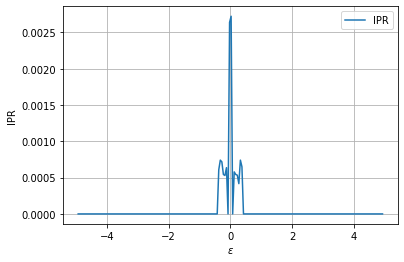

In [75]:
dis = 0.
tx = 1.1
ty = 0.9
t2 = 0.8
m = 2.12


L = 12


delta_E = 0.05

pos = np.arange(0,tx+ty+t2+m+dis/2+delta_E,delta_E)
neg = np.sort(-np.arange(delta_E,tx+ty+t2+m+dis/2+delta_E,delta_E))
bins = np.concatenate((neg, pos))
new_bins = 0.*bins

for i in range(len(bins)-1):
    new_bins[i] = (bins[i]+bins[i+1])/2



    
h = matrixBTwistsTransInv_cut(L,tx,ty,t2,m,dis,PBC=True)



eig, vec = sla.eigsh(h,100, sigma=0., which='LM')



ipr = 0.*bins


for j in range(len(ipr)-1):
    count = 0
    en1 = bins[j]
    en2 = bins[j+1]
    for k in range(len(eig)):
        if eig[k]<en2 and eig[k]>en1:
            count += 1
            ipr[j] += np.sum(np.abs(vec[:,k])**4)
    if count == 0:
        continue 
    else:
        ipr[j] = ipr[j]/count
            
plt.plot(new_bins[:-1],ipr[:-1],label='IPR')
plt.ylabel('IPR')
plt.xlabel('$\epsilon$')

plt.legend()
plt.grid()
plt.show



## CBC

<function matplotlib.pyplot.show(close=None, block=None)>

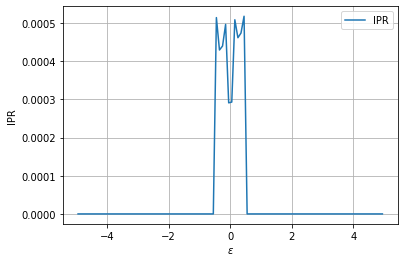

In [31]:
dis = 0.
tx = 1.1
ty = 0.9
t2 = 0.8
m = 2.12


L = 12


delta_E = 0.1

pos = np.arange(0,tx+ty+t2+m+dis/2+delta_E,delta_E)
neg = np.sort(-np.arange(delta_E,tx+ty+t2+m+dis/2+delta_E,delta_E))
bins = np.concatenate((neg, pos))
new_bins = 0.*bins

for i in range(len(bins)-1):
    new_bins[i] = (bins[i]+bins[i+1])/2



    
h = matrixBTwistsTransInv(L,t2,m,dis,PBC=True)



eig, vec = sla.eigsh(h,100, sigma=0., which='LM')



ipr = 0.*bins


for j in range(len(ipr)-1):
    count = 0
    en1 = bins[j]
    en2 = bins[j+1]
    for k in range(len(eig)):
        if eig[k]<en2 and eig[k]>en1:
            count += 1
            ipr[j] += np.sum(np.abs(vec[:,k])**4)
    if count == 0:
        continue 
    else:
        ipr[j] = ipr[j]/count
            
plt.plot(new_bins[:-1],ipr[:-1],label='IPR')
plt.ylabel('IPR')
plt.xlabel('$\epsilon$')

plt.legend()
plt.grid()
plt.show



# DOS

## OBC

0.6944444444444443


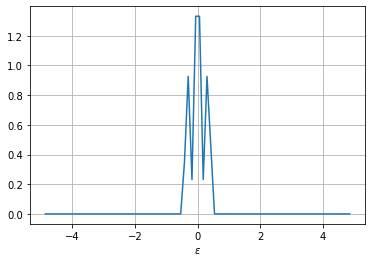

In [76]:
dis = 0.
tx = 1.1
ty = 0.9
t2 = 0.8
m = 2.12


L = 12




delta_E = 0.12
pos = np.arange(0,tx+ty+t2+m+dis/2+delta_E,delta_E)
neg = np.sort(-np.arange(delta_E,tx+ty+t2+m+dis/2+delta_E,delta_E))
bins = np.concatenate((neg, pos))
new_bins = 0.*bins

for i in range(len(bins)-1):
    new_bins[i] = (bins[i]+bins[i+1])/2
    
    
h = matrixBTwistsTransInv_cut(L,tx,ty,t2,m,dis,PBC=True)



eig, vec = sla.eigsh(h,100, sigma=0., which='LM')

counts = 0.*bins

for i in range(len(counts)-1):
    en1 = bins[i]
    en2 = bins[i+1]
    for en in eig:
        if en<en2 and en>en1:
            counts[i] += 1
dos = counts/((L*L)*delta_E)
print(np.sum(dos)*delta_E)



plt.plot(new_bins[:-1],dos[:-1])


plt.xlabel('$\epsilon$')

plt.grid()
plt.show()

## CBC

0.05787037037037038


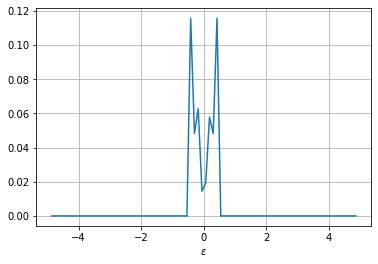

In [77]:
dis = 0.
tx = 1.1
ty = 0.9
t2 = 0.8
m = 2.12


L = 12




delta_E = 0.12
pos = np.arange(0,tx+ty+t2+m+dis/2+delta_E,delta_E)
neg = np.sort(-np.arange(delta_E,tx+ty+t2+m+dis/2+delta_E,delta_E))
bins = np.concatenate((neg, pos))
new_bins = 0.*bins

for i in range(len(bins)-1):
    new_bins[i] = (bins[i]+bins[i+1])/2
    
    
h = matrixBTwistsTransInv(L,t2,m,dis,PBC=True)



eig, vec = sla.eigsh(h,100, sigma=0., which='LM')

counts = 0.*bins

for i in range(len(counts)-1):
    en1 = bins[i]
    en2 = bins[i+1]
    for en in eig:
        if en<en2 and en>en1:
            counts[i] += 1
dos = counts/((L*L*L)*delta_E)
print(np.sum(dos)*delta_E)



plt.plot(new_bins[:-1],dos[:-1])


plt.xlabel('$\epsilon$')

plt.grid()
plt.show()

# Estimating $\mu$

## CBC

In [8]:
Les = np.arange(10,22,2)

nev = 20

dis = 0.
tx = 1.1
ty = 0.9
t2 = 0.8
m = 2.12

wids = []

for L in Les:
    print(L)
    h = matrixBTwistsTransInv(L,t2,m,dis,PBC=True)
    eig, vec = sla.eigsh(h,nev, sigma=0., which='LM')
    width = np.abs(np.amax(eig)-np.amin(eig))
    wids.append(width)

10
12
14
16
18
20


[[ 0.26719066 -0.7163044 ]
 [-0.7163044   1.93522595]]


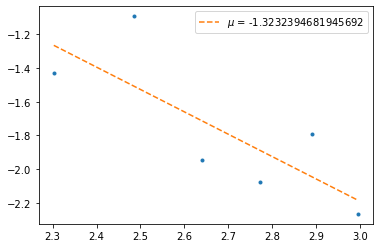

In [9]:
plt.plot(np.log(Les),np.log(wids),'.')



def func(x,a,b):
    return a*x + b

popt, pcov = curve_fit(func,np.log(Les),np.log(wids))
print(pcov)

plt.plot(np.log(Les),popt[0]*np.log(Les) + popt[-1],'--',label='$\mu$ = '+str(popt[0]))
plt.legend()

## OBC

In [12]:
Les = np.arange(10,22,2)

nev = 10

dis = 0.
tx = 1.1
ty = 0.9
t2 = 0.8
m = 2.12

wids = []

for L in Les:
    print(L)
    h = matrixBTwistsTransInv_cut(L,tx,ty,t2,m,dis,PBC=True)
    eig, vec = sla.eigsh(h,nev, sigma=0., which='LM')
    width = np.abs(np.amax(eig)-np.amin(eig))
    wids.append(width)

10
12
14
16
18
20


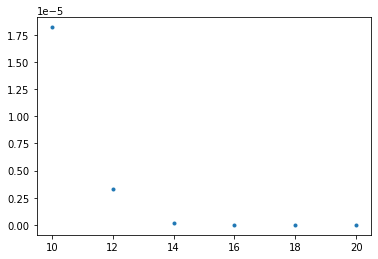

In [14]:
plt.plot(Les,wids,'.')



def func(x,a,b):
    return a*x + b

#popt, pcov = curve_fit(func,np.log(Les),np.log(wids))
#print(pcov)

#plt.plot(np.log(Les),popt[0]*np.log(Les) + popt[-1],'--',label='$\mu$ = '+str(popt[0]))
#plt.legend()

In [6]:
kx = []
ky = []
zeros = []
for k1 in np.linspace(-np.pi,np.pi,50):
    for k2 in np.linspace(-np.pi,np.pi,50):
        kx.append(k1)
        ky.append(k2)
        zeros.append(0.)
DataOut = np.column_stack((kx,ky,zeros))
np.savetxt('output.dat', DataOut)


In [7]:
x, y, yerr = np.loadtxt('output.dat',unpack=True)

In [14]:
x

array([-3.14159265, -3.14159265, -3.14159265, ...,  3.14159265,
        3.14159265,  3.14159265])

## Winding

In [7]:
#PBC=True if periodic boundary conditions, PBC=False for random twists  
def matrixBTwistsTransInv_cut_quiral(Lx,Ly,Lz,tx,ty,t2,m,W,theta,PBC):
	dtypein=complex
	row=np.empty([16*Lx*Ly*Lz - 2*Lx*Ly*Lz])
	col=np.empty([16*Lx*Ly*Lz - 2*Lx*Ly*Lz])
	data=np.empty([16*Lx*Ly*Lz - 2*Lx*Ly*Lz],dtype=dtypein)
	

	if(PBC==True):
		thetax=thetay=thetaz=0
	else:
		thetax=complex(0,random.random()*2*np.pi)
		thetay=complex(0,random.random()*2*np.pi)
		thetaz=complex(0,random.random()*2*np.pi)
				
	index=0
    
    # Z=0
	dis_m_0 = random.random()*W - W/2
	for y in range(Ly):
		for x in range(Lx):

			# same site hopping between orbitals A and B (m)
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,0)
			data[index]=-m+dis_m_0
			index+=1			
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			data[index]=-m +dis_m_0
			index+=1					

			#HOPPINGS
				
			arrayNN=f(Lx,Ly,Lz,x,y,0)# array with coordinates of NN
				
			#xhoppings
			neigIndex1=0
			neigIndex2=1
			xhoppingright=tx*np.exp(thetax/Lx)/2.
			xhoppingleft=tx*np.exp(-thetax/Lx)/2.			

			#neig left
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			data[index]=xhoppingleft
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			data[index]=xhoppingleft.conjugate()
			index+=1	
				
			#neig right
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			data[index]=xhoppingright
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			data[index]=xhoppingright.conjugate()
			index+=1	

				

			#yhoppings
			neigIndex1=2
			neigIndex2=3
			yhoppingright=ty*np.exp(thetay/Ly)/2.
			yhoppingleft=ty*np.exp(-thetay/Ly)/2.				
				
			#neig left
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			data[index]=yhoppingleft
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			data[index]=yhoppingleft.conjugate()
			index+=1	
				
			#neig right
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			data[index]=yhoppingright
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			data[index]=yhoppingright.conjugate()
			index+=1


				
			#zhoppings
			neigIndex2=5
			zhoppingup=(1-t2)*np.exp(thetaz/Lz)/2.

			neigIndex1=4
			zhoppingdown=(1+t2)*np.exp(-thetaz/Lz)/2.
			
			#neig down
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			data[index]=(zhoppingdown+ (random.random()*W-W/2))*np.exp(1j*theta)
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			data[index]=(zhoppingdown+ (random.random()*W-W/2))*np.exp(-1j*theta)
			index+=1
			#neig up
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			data[index]=zhoppingup+ (random.random()*W-W/2)
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,0)
			data[index]=zhoppingup.conjugate()+ (random.random()*W-W/2)
			index+=1
            
    
    
	for z in range(1,Lz-1):
		dis_m = random.random()*W - W/2
		for y in range(Ly):
			for x in range(Lx):
				
				# same site hopping between orbitals A and B (m)
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,z)
				data[index]=-m+dis_m
				index+=1			
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=-m+dis_m
				index+=1					

				#HOPPINGS
				
				arrayNN=f(Lx,Ly,Lz,x,y,z)# array with coordinates of NN
				
				#xhoppings
				neigIndex1=0
				neigIndex2=1
				xhoppingright=tx*np.exp(thetax/Lx)/2.
				xhoppingleft=tx*np.exp(-thetax/Lx)/2.			

				#neig left
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				data[index]=xhoppingleft
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=xhoppingleft.conjugate()
				index+=1	
				
				#neig right
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				data[index]=xhoppingright
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=xhoppingright.conjugate()
				index+=1	

				

				#yhoppings
				neigIndex1=2
				neigIndex2=3
				yhoppingright=ty*np.exp(thetay/Ly)/2.
				yhoppingleft=ty*np.exp(-thetay/Ly)/2.				
				
				#neig left
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				data[index]=yhoppingleft
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=yhoppingleft.conjugate()
				index+=1	
				
				#neig right
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				data[index]=yhoppingright
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=yhoppingright.conjugate()
				index+=1


				
				#zhoppings
				neigIndex1=4
				neigIndex2=5
				zhoppingup=(1-t2)*np.exp(thetaz/Lz)/2.
				zhoppingdown=(1+t2)*np.exp(-thetaz/Lz)/2.
				
				#neig down
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				data[index]=zhoppingdown + (random.random()*W-W/2)
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=zhoppingdown.conjugate()+(random.random()*W-W/2)
				index+=1		
				
				#neig up
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				data[index]=zhoppingup + (random.random()*W-W/2)
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=zhoppingup.conjugate()+ (random.random()*W-W/2)
				index+=1	

            
    # Z=L-1
	dis_m_top = random.random()*W-W/2
	for y in range(Ly):
		for x in range(Lx):

			# same site hopping between orbitals A and B (m)
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,Lz-1)
			data[index]=-m+dis_m_top
			index+=1			
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			data[index]=-m+dis_m_top
			index+=1					

			#HOPPINGS
				
			arrayNN=f(Lx,Ly,Lz,x,y,Lz-1)# array with coordinates of NN
				
			#xhoppings
			neigIndex1=0
			neigIndex2=1
			xhoppingright=tx*np.exp(thetax/Lx)/2.
			xhoppingleft=tx*np.exp(-thetax/Lx)/2.			

			#neig left
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			data[index]=xhoppingleft
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			data[index]=xhoppingleft.conjugate()
			index+=1	
				
			#neig right
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			data[index]=xhoppingright
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			data[index]=xhoppingright.conjugate()
			index+=1	

				

			#yhoppings
			neigIndex1=2
			neigIndex2=3
			yhoppingright=ty*np.exp(thetay/Ly)/2.
			yhoppingleft=ty*np.exp(-thetay/Ly)/2.				
				
			#neig left
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			data[index]=yhoppingleft
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			data[index]=yhoppingleft.conjugate()
			index+=1	
				
			#neig right
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			data[index]=yhoppingright
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			data[index]=yhoppingright.conjugate()
			index+=1


				
			#zhoppings
			neigIndex1=4
			zhoppingdown=(1+t2)/2.
			neigIndex2=5
			zhoppingup=(1-t2)/2.
			
			#neig down
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			data[index]=zhoppingdown+ (random.random()*W-W/2)
			index+=1					
				
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			data[index]=zhoppingdown.conjugate() + (random.random()*W-W/2)
			index+=1		
			
			#neig up
			row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			data[index]=(zhoppingup+ (random.random()*W-W/2))*np.exp(1j*theta)
			index+=1					
			
			row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
			col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,Lz-1)
			data[index]=(zhoppingup+ (random.random()*W-W/2))*np.exp(-1j*theta)
			index+=1	
					
	mtx = sparse.csc_matrix((data, (row, col)), shape=(2*Lx*Ly*Lz, 2*Lx*Ly*Lz), dtype=dtypein)

	return mtx.toarray()

## Disorder xyz

In [15]:
# returns nearest neighbors of site (x,y,z) 

def f(Lx,Ly,Lz, x,y,z):
    xm1= (x-1)%Lx  
    xp1=(x+1)%Lx  
    ym1= (y-1)%Ly 
    yp1=(y+1)%Ly  
    zm1= (z-1)%Lz 
    zp1=(z+1)%Lz  
  
    return np.array([[xm1,y,z], [xp1,y,z], [x,ym1,z], [x,yp1,z], [x,y,zm1], [x,y,zp1]])

# returns 1-d index 

#0 for orbital A and 1 for orbital B 

def matrixIndexOrb(Lx,Ly,Lz,orb,x,y,z):
	return orb*Lx*Ly*Lz + z*Lx*Ly + y*Lx + x




#PBC=True if periodic boundary conditions, PBC=False for random twists  
def matrixBTwistsTransInv_cut_xyz_quiral(Lx,Ly,Lz,tx,ty,t2,m,W,PBC):
	dtypein=complex
	row=np.empty([14*Lx*Ly*Lz])
	col=np.empty([14*Lx*Ly*Lz])
	data=np.empty([14*Lx*Ly*Lz],dtype=dtypein)
	

	if(PBC==True):
		thetax=thetay=thetaz=0
	else:
		thetax=complex(0,random.random()*2*np.pi)
		thetay=complex(0,random.random()*2*np.pi)
		thetaz=complex(0,random.random()*2*np.pi)
				
	index=0
    
 
	for z in range(Lz):
		for y in range(Ly):
			for x in range(Lx):

				# same site hopping between orbitals A and B (m)
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,z)
				data[index]=-m
				index+=1			
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=-m
				index+=1					

				#HOPPINGS
				
				arrayNN=f(Lx,Ly,Lz,x,y,z)# array with coordinates of NN
				
				#xhoppings
				neigIndex1=0
				neigIndex2=1
				xhoppingright=tx*np.exp(thetax/Lx)/2.
				xhoppingleft=tx*np.exp(-thetax/Lx)/2.			

				#neig left
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				data[index]=xhoppingleft
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=xhoppingleft.conjugate()
				index+=1	
				
				#neig right
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				data[index]=xhoppingright
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=xhoppingright.conjugate()
				index+=1	

				

				#yhoppings
				neigIndex1=2
				neigIndex2=3
				yhoppingright=ty*np.exp(thetay/Ly)/2.
				yhoppingleft=ty*np.exp(-thetay/Ly)/2.				
				
				#neig left
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				data[index]=yhoppingleft
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=yhoppingleft.conjugate()
				index+=1	
				
				#neig right
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				data[index]=yhoppingright
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=yhoppingright.conjugate()
				index+=1


				
				#zhoppings
				neigIndex1=4
				neigIndex2=5
				zhoppingup=(1-t2)*np.exp(thetaz/Lz)/2.
				zhoppingdown=(1+t2)*np.exp(-thetaz/Lz)/2.
				
				#neig down
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				data[index]=zhoppingdown
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex1][0],arrayNN[neigIndex1][1],arrayNN[neigIndex1][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=zhoppingdown.conjugate()
				index+=1		
				
				#neig up
				row[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				col[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				data[index]=zhoppingup
				index+=1					
				
				row[index]=matrixIndexOrb(Lx,Ly,Lz,1,arrayNN[neigIndex2][0],arrayNN[neigIndex2][1],arrayNN[neigIndex2][2])
				col[index]=matrixIndexOrb(Lx,Ly,Lz,0,x,y,z)
				data[index]=zhoppingup.conjugate()
				index+=1	

            

	mtx = sparse.csc_matrix((data, (row, col)), shape=(2*Lx*Ly*Lz, 2*Lx*Ly*Lz), dtype=dtypein)

	return mtx.toarray()

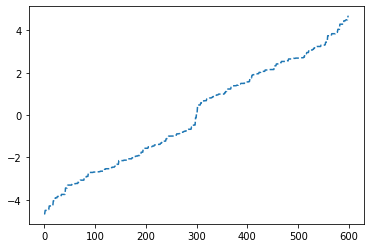

In [16]:
A2 = matrixBTwistsTransInv_cut_xyz_quiral(10,3,10,1.1,0.9,0.8,2.12,0.,PBC=True)
eig2 = np.linalg.eigh(A2)
plt.plot(eig2[0],'--')

In [19]:
tx = 1.1
ty = 0.9
m = 2.12
t2 = 0.8
Nx = Ny = Nz =10
M = Nx*Ny*Nz
W = 0.

#twists
L = 10
thetas = np.arange(0,2*np.pi,2*np.pi/L)
dtheta = (2*np.pi)/L

h = matrixBTwistsTransInv_cut_quiral(Nx,Ny,Nz,tx,ty,t2,m,W,0.,PBC=True)
vec = np.linalg.eigh(h)[1]
phi01 = (np.linalg.eigh(h)[1])[:,:M]
c1 = np.identity(M)
c_new1 = np.identity(M)
bi = phi01.copy()
for theta in thetas[:-1]:
    phi1 = (np.linalg.eigh(matrixBTwistsTransInv_cut_quiral(Nx,Ny,Nz,tx,ty,t2,m,W,theta+dtheta,PBC=True))[1])[:,:M]
    c_new1 = np.matmul(c1,np.matmul(np.conjugate(phi01).T,phi1))
    phi01 = phi1
    c1 = c_new1
c_new1 = np.matmul(c1,np.matmul(np.conjugate(phi01).T,bi))
eigen1 = np.linalg.eigvals(c_new1)
wind = (1/np.pi)*np.abs(np.sum(np.arctan2(np.imag(eigen1),np.real(eigen1))))
wind

4.99999999999999

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


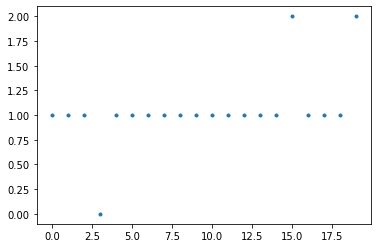

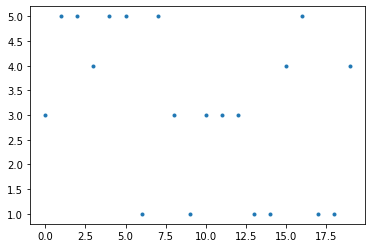

In [121]:
tx = 1.1
ty = 0.9
m = 2.12
t2 = 0.8
Nx = 10 
Ny = 3
Nz = 10
M = Nx*Ny*Nz
W = 1.76768

#twists
L = 10
thetas = np.arange(0,2*np.pi,2*np.pi/L)
dtheta = (2*np.pi)/L
st = []
bv = []

for i in range(20):
    print(i)
    h = matrixBTwistsTransInv_cut_quiral(Nx,Ny,Nz,tx,ty,t2,m,W,0.,PBC=True)
    vec = np.linalg.eigh(h)[1]
    phi01 = (np.linalg.eigh(h)[1])[:,:M]
    c1 = np.identity(M)
    c_new1 = np.identity(M)
    bi = phi01.copy()
    for theta in thetas[:-1]:
        phi1 = (np.linalg.eigh(matrixBTwistsTransInv_cut_quiral(Nx,Ny,Nz,tx,ty,t2,m,W,theta+dtheta,PBC=True))[1])[:,:M]
        c_new1 = np.matmul(c1,np.matmul(np.conjugate(phi01).T,phi1))
        phi01 = phi1
        c1 = c_new1
    c_new1 = np.matmul(c1,np.matmul(np.conjugate(phi01).T,bi))
    eigen1 = np.linalg.eigvals(c_new1)
    wind = (1/np.pi)*np.abs(np.sum(np.arctan2(np.imag(eigen1),np.real(eigen1))))

    st.append(wind%2)
    bv.append(wind)
plt.plot(st,'.')
plt.show()
plt.plot(bv,'.')
plt.show()

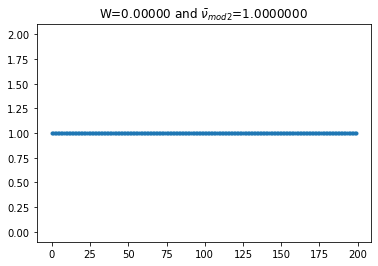

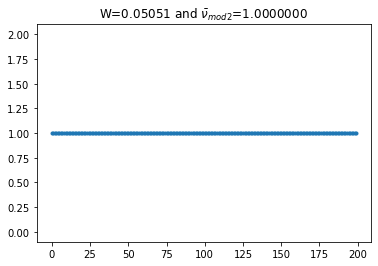

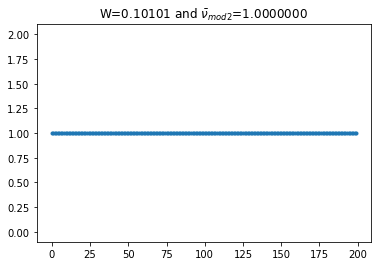

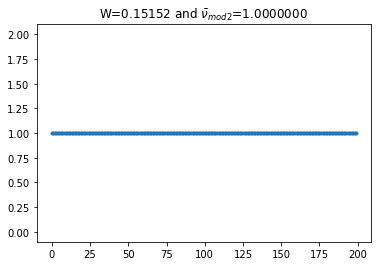

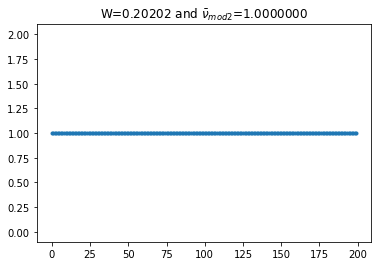

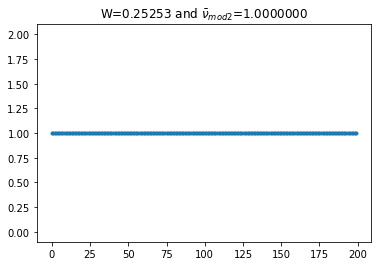

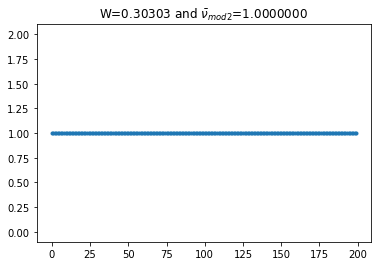

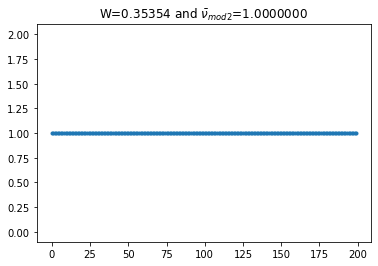

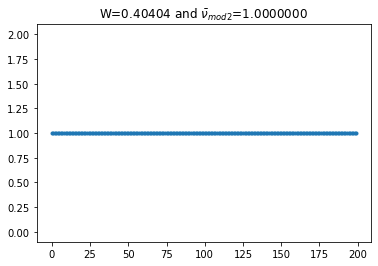

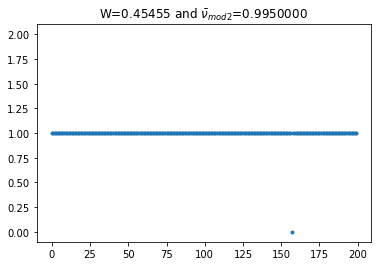

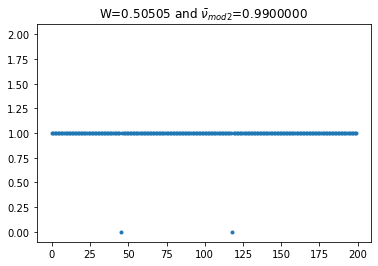

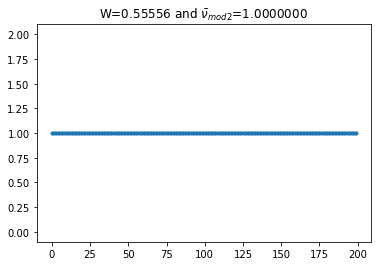

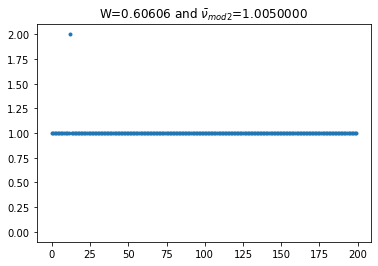

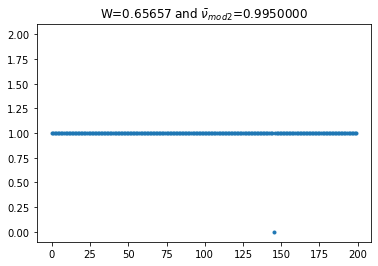

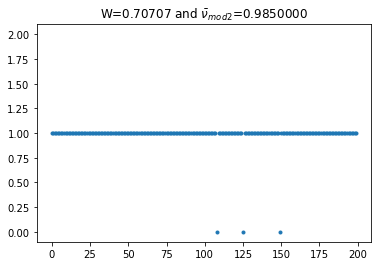

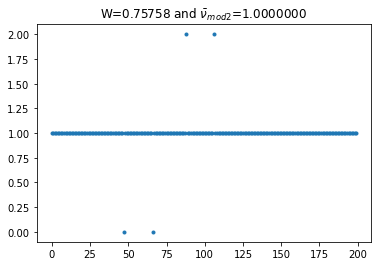

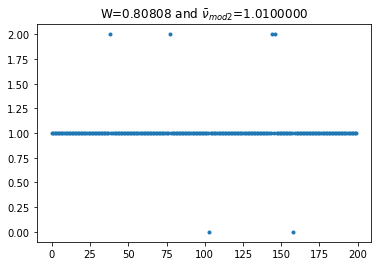

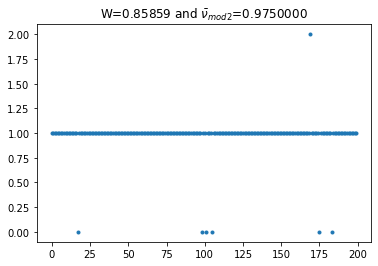

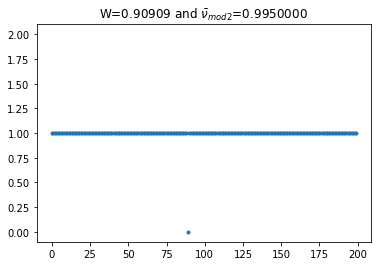

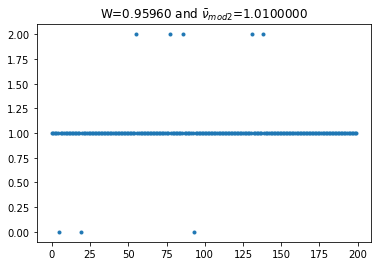

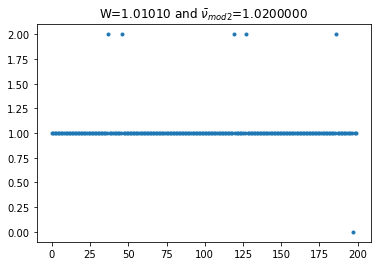

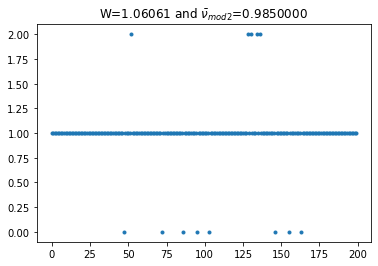

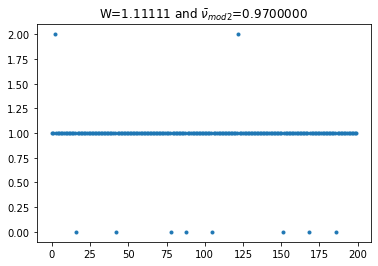

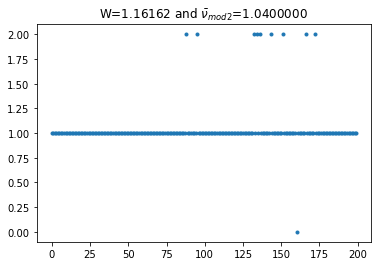

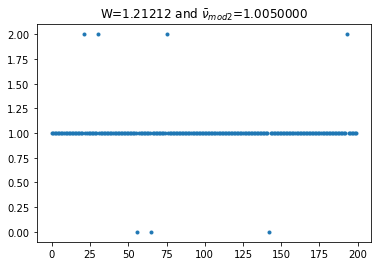

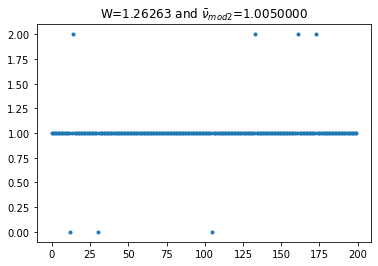

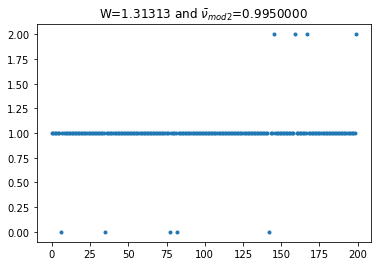

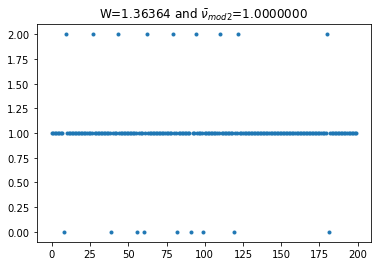

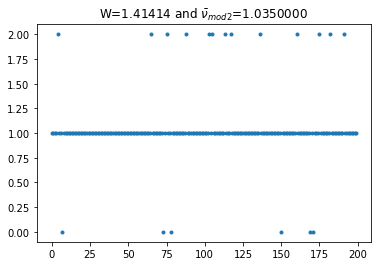

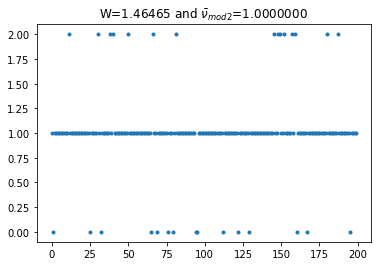

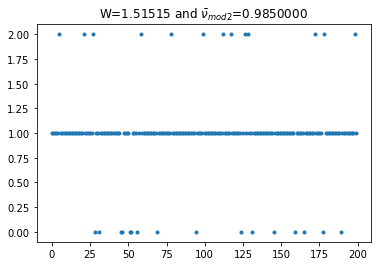

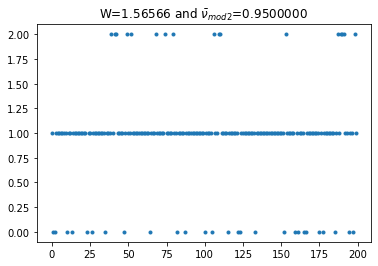

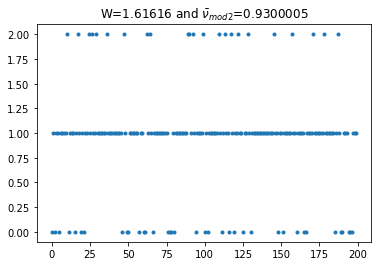

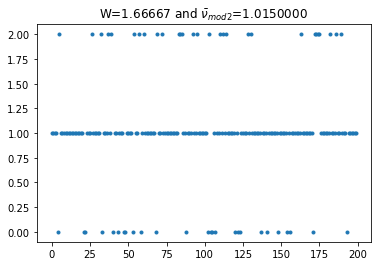

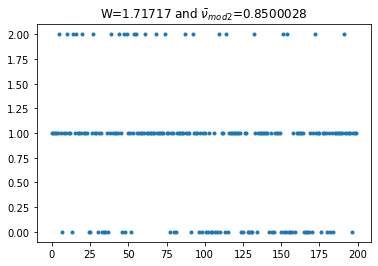

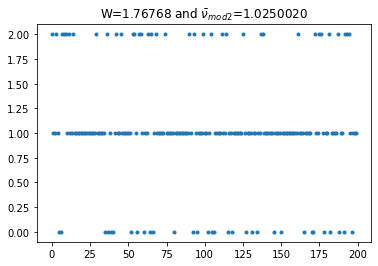

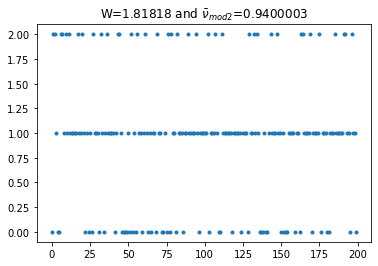

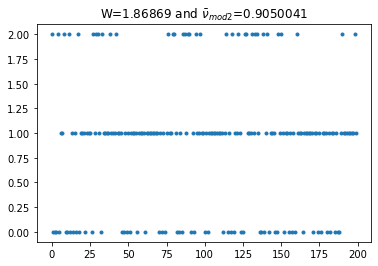

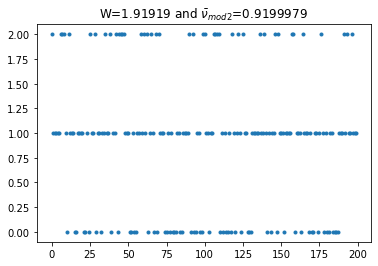

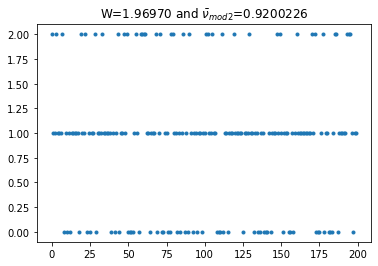

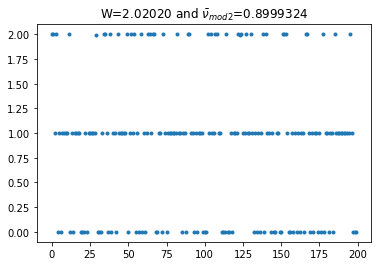

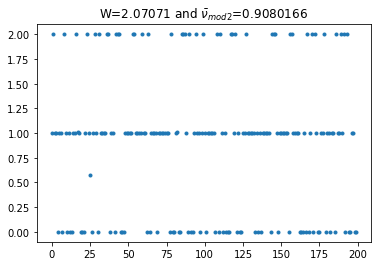

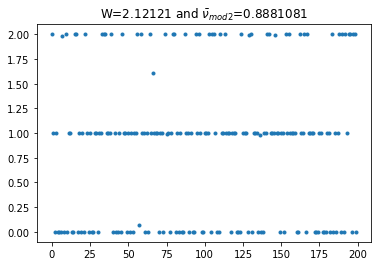

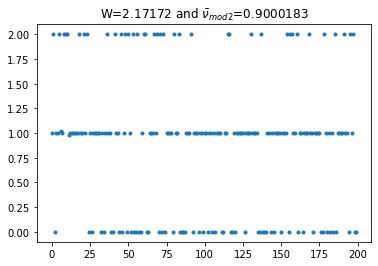

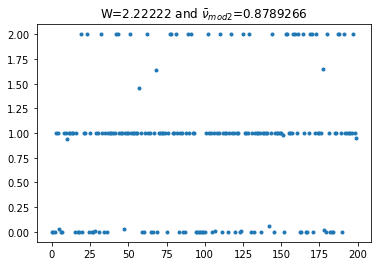

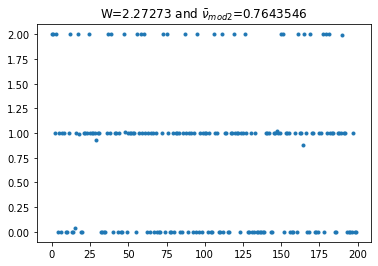

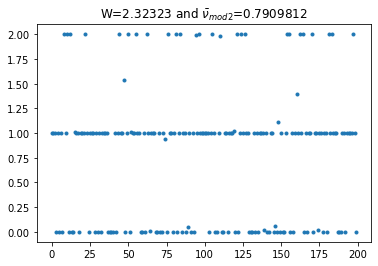

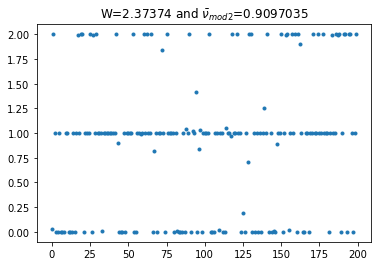

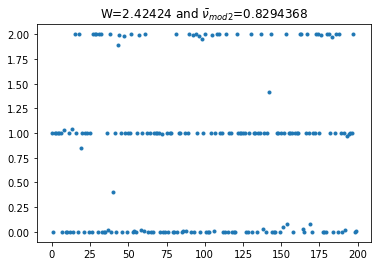

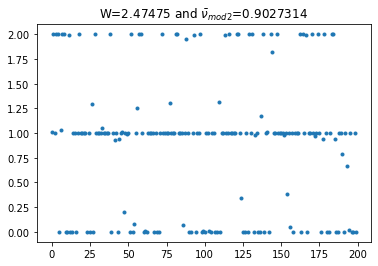

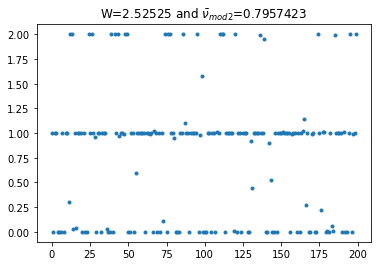

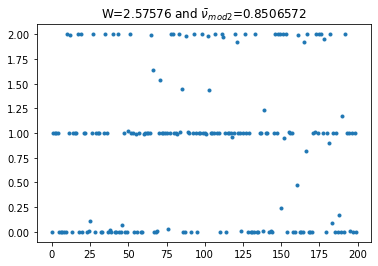

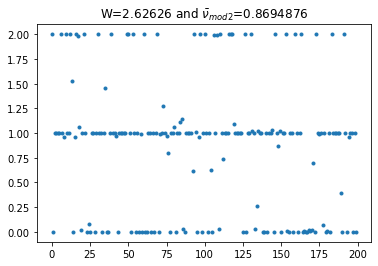

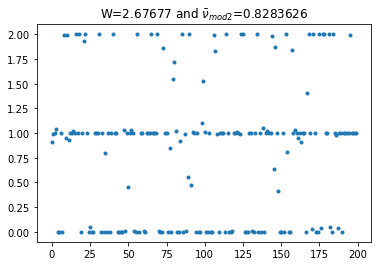

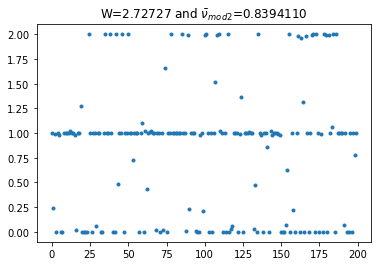

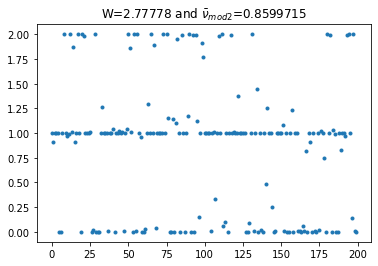

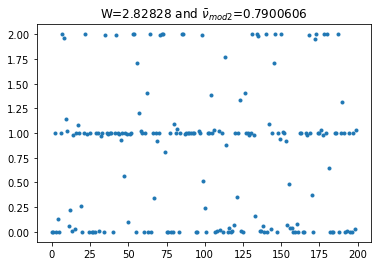

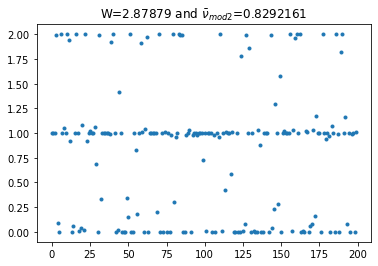

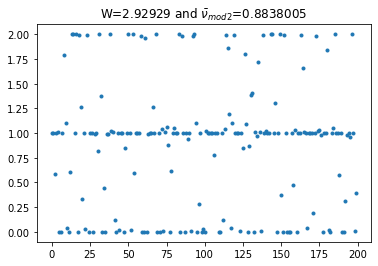

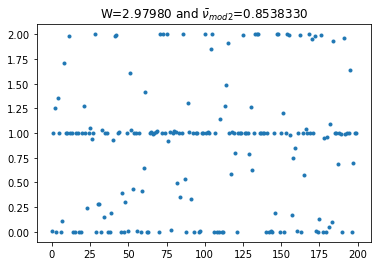

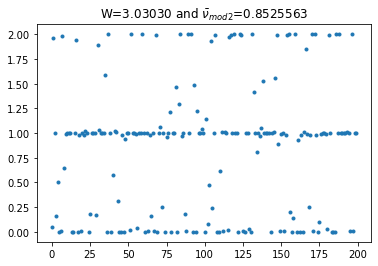

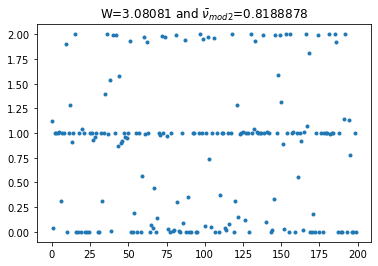

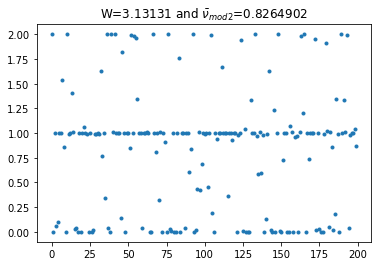

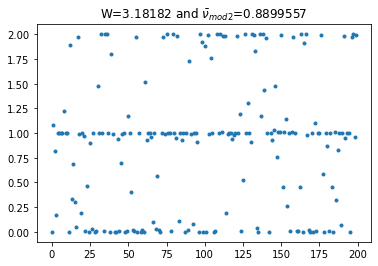

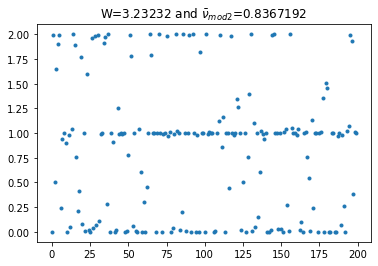

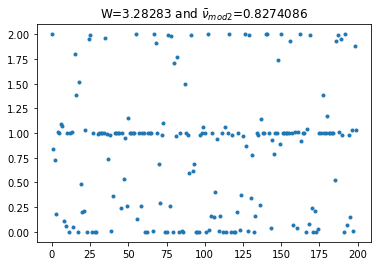

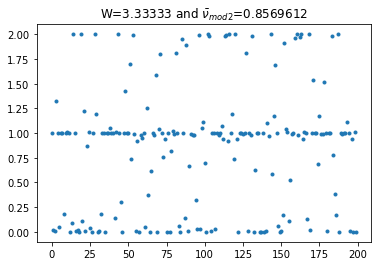

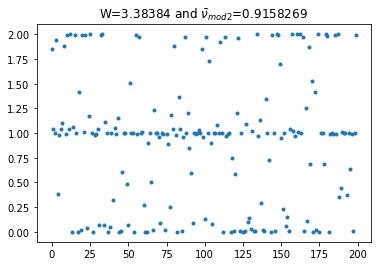

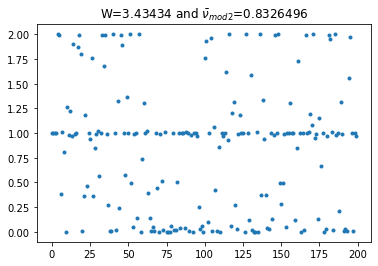

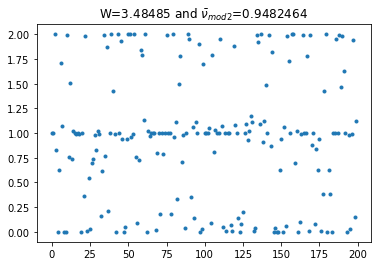

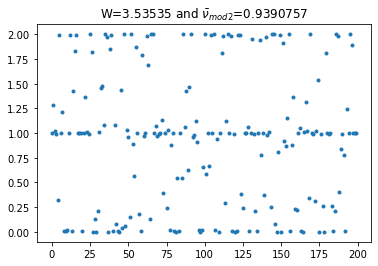

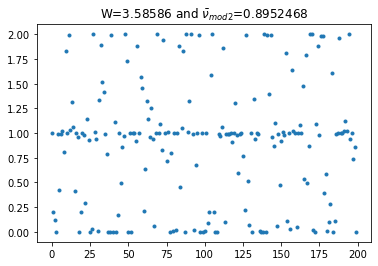

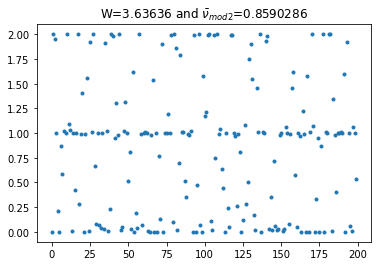

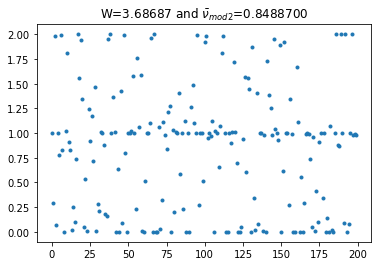

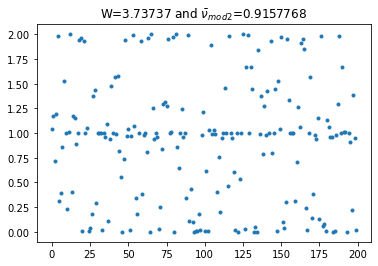

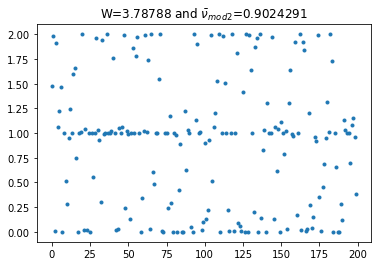

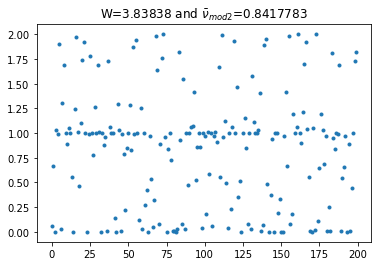

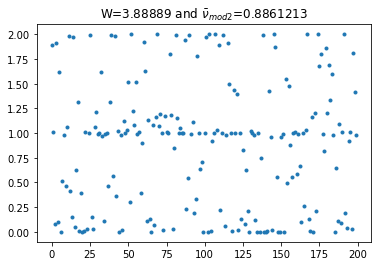

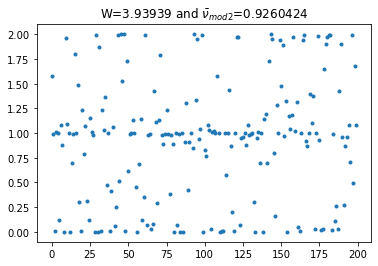

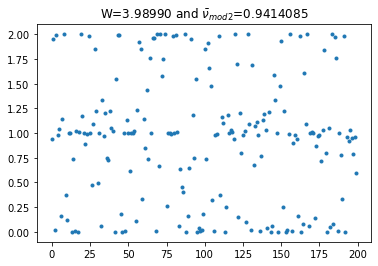

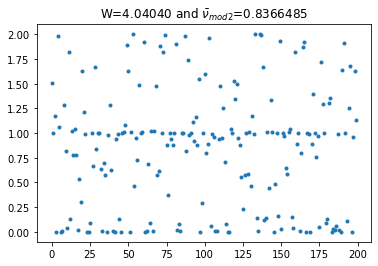

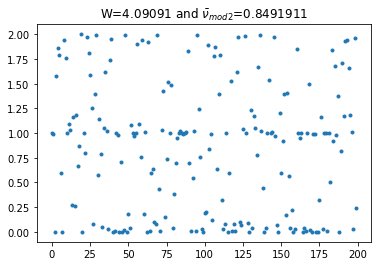

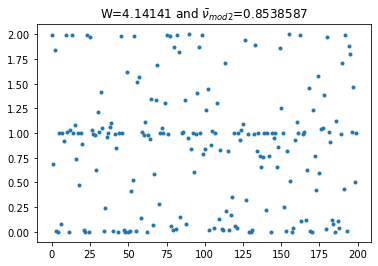

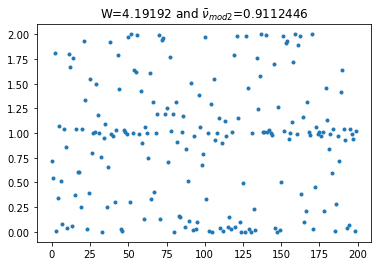

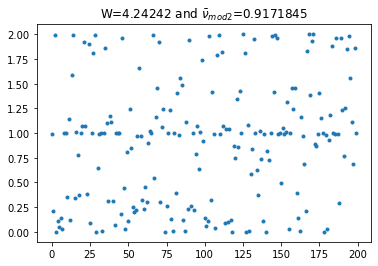

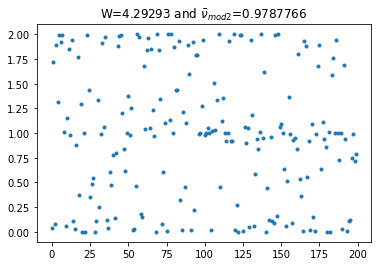

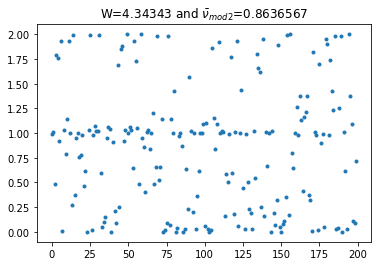

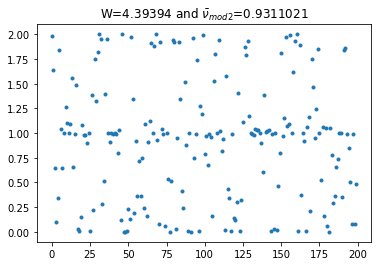

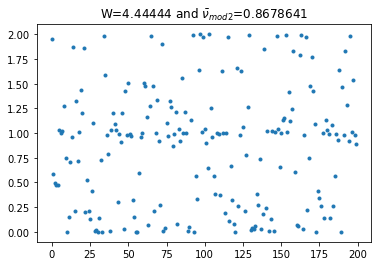

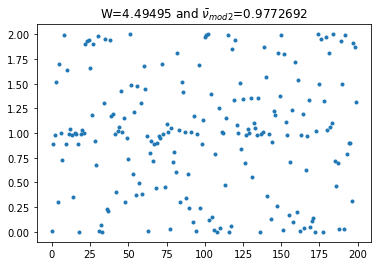

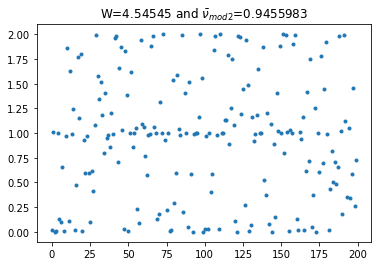

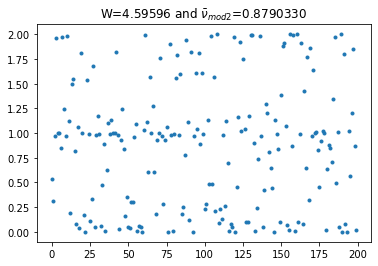

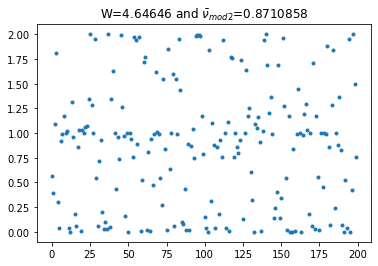

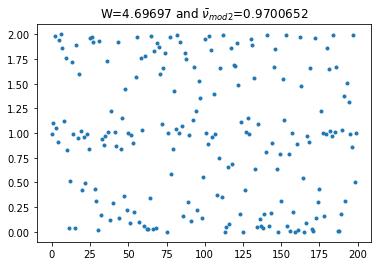

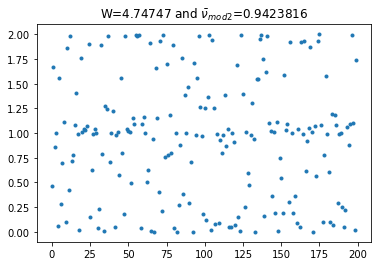

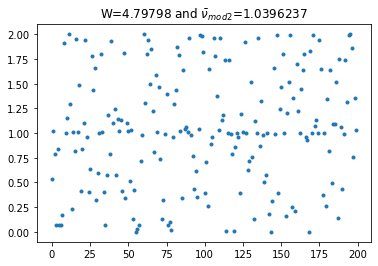

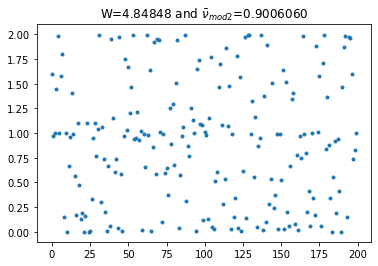

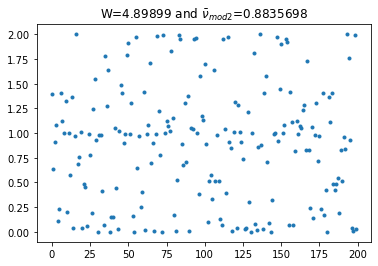

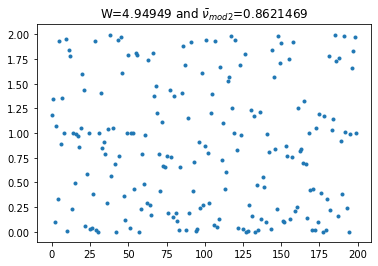

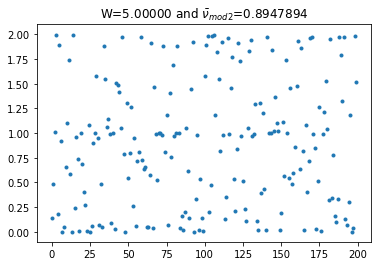

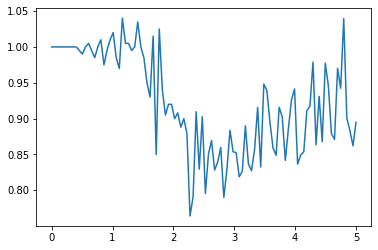

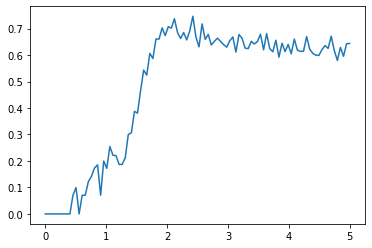

In [66]:
desordem = np.linspace(0,5,100)
Nx = 10 
Ny = 3
Nz = 10
realizacoes=200

winds = []
sigma = []

for w in desordem:
    number = []
    fi = open('wind_xy_per_quiral_'+str(realizacoes)+'_'+"%.5f"%w)
    a = fi.read()
    b = a.split()
    for i in range(len(b)):
        number.append(float(b[i]))
    plt.plot(number,'.')
    plt.title("W="+"%.5f"%w+r" and $\bar{\nu}_{mod2}$=%.7f"%np.average(number))
    plt.ylim(-0.1,2.1)
    plt.show()
    winds.append(np.average(number))
    sigma.append(np.std(number))
    fi.close()

plt.plot(desordem,winds,'-')
plt.show()
plt.plot(desordem,sigma)

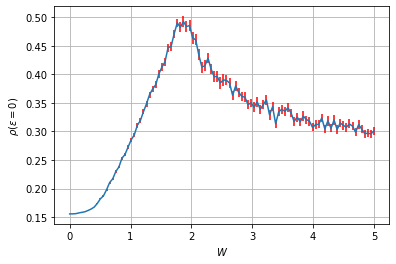

In [78]:
dis = np.zeros(100)
rho = np.zeros(100)
dev = np.zeros(100)
for k in range(100):
    fi = open('zero_dos_xy_periodic.dat')
    a = fi.readlines(0)[k].replace('\n','')
    b = a[2:-2].split()
    dis[k] = b[0]
    rho[k] = b[1]
    dev[k] = b[2]
    fi.close()
dis_ord = np.sort(dis)
rho_ord = 0.*dis
dev_ord = 0.*dis
for i in range(len(dis)):
    index = np.where(dis == dis_ord[i])[0][0]
    rho_ord[i] = rho[index]
    dev_ord[i] = dev[index]
    
dev_ord *= 1/np.sqrt(200)
plt.errorbar(dis_ord,rho_ord,dev_ord,ecolor='r')
plt.xlabel('$W$')
plt.ylabel(r'$\rho \left(\epsilon = 0\right)$')
plt.grid()
plt.show()

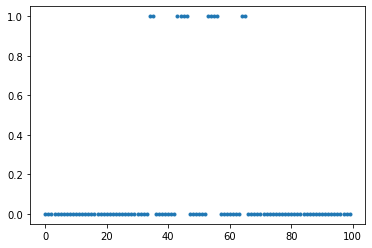

In [18]:
# Parameters 
tx = 1.1
ty = 0.9
m = 2.12
t2 = 0.8
kx = []
ky = []
N =10
M = N
realizacoes = 1

pares = np.arange(0,2*N,2)
impares = pares+1


#twists
L = 10
thetas = np.arange(0,2*np.pi,2*np.pi/L)
dtheta = (2*np.pi)/L

W = 0.  #disorder amplitude

numbers = []
devs = []


for k1 in np.linspace(-np.pi,np.pi,10):
    for k2 in np.linspace(-np.pi,np.pi,10):
        winds = np.zeros(realizacoes)
        for j in range(realizacoes):
            dis = np.random.uniform(-W/2,W/2,2*N)
            h = H_twist_z(tx,ty,m,t2,k1,k2,N,0.,dis)
            vec = np.linalg.eigh(h)[1]
            phi01 = (np.linalg.eigh(h)[1])[:,:M]
            c1 = np.identity(M)
            c_new1 = np.identity(M)
            bi = phi01.copy()
            for theta in thetas[:-1]:
                phi1 = (np.linalg.eigh(H_twist_z(tx,ty,m,t2,k1,k2,N,theta+dtheta,dis))[1])[:,:M]
                c_new1 = np.matmul(c1,np.matmul(np.conjugate(phi01).T,phi1))
                phi01 = phi1
                c1 = c_new1
            c_new1 = np.matmul(c1,np.matmul(np.conjugate(phi01).T,bi))
            eigen1 = np.linalg.eigvals(c_new1)
            wind = (1/np.pi)*np.abs(np.sum(np.arctan2(np.imag(eigen1),np.real(eigen1))))
            winds[j] = wind
        average = np.average(winds)
        numbers.append(average)
        stand_dev = np.std(winds)
        devs.append(stand_dev)
        kx.append(k1)
        ky.append(k2)
plt.plot(numbers,'.')